# Prva domaća zadaća --- jednadžba siluete jajeta

Kao rješenje prve domaće zadaće iz kolegija _matematički softver_ predajem kratki pregled konstrukcije implicitne jednadžbe jajolike krivulje u ortogonalnom dvodimenzionalnom Kartezijevom koordinatnom sustavu odnosno u polarnom koordinatnom sustavu. Zadaća se sastoji od  dijelova
1. [Uvod](#uvod) -- polazište otkuda i zašto krećemo prema jednadžbi siluete jajeta,
2. [Matematički račun](#racun) -- konstrukcija i analiza implicitne jednadžbe,
    1. [Implicitna jednadžba](#implicitna) -- izračun implicitne [jednadžbe](#jednadzba) iz okvira postavljenih u dijelu [_Uvod_](#uvod),
    2. [Primjeri](#primjeri) -- demonstracija nekih primjera skupova zadanih implicitnom jednadžbom dobivenom u dijelu [_Implicitna jednadžba_](#implicitna),
3. [Zaključak](#zakljucak) -- zaključak ove zadaće

## Uvod <a name="uvod"></a>

Prepelicja jaja (gore lijevo), kokosje jaje (dolje lijevo) i nojevo jaje (desno)


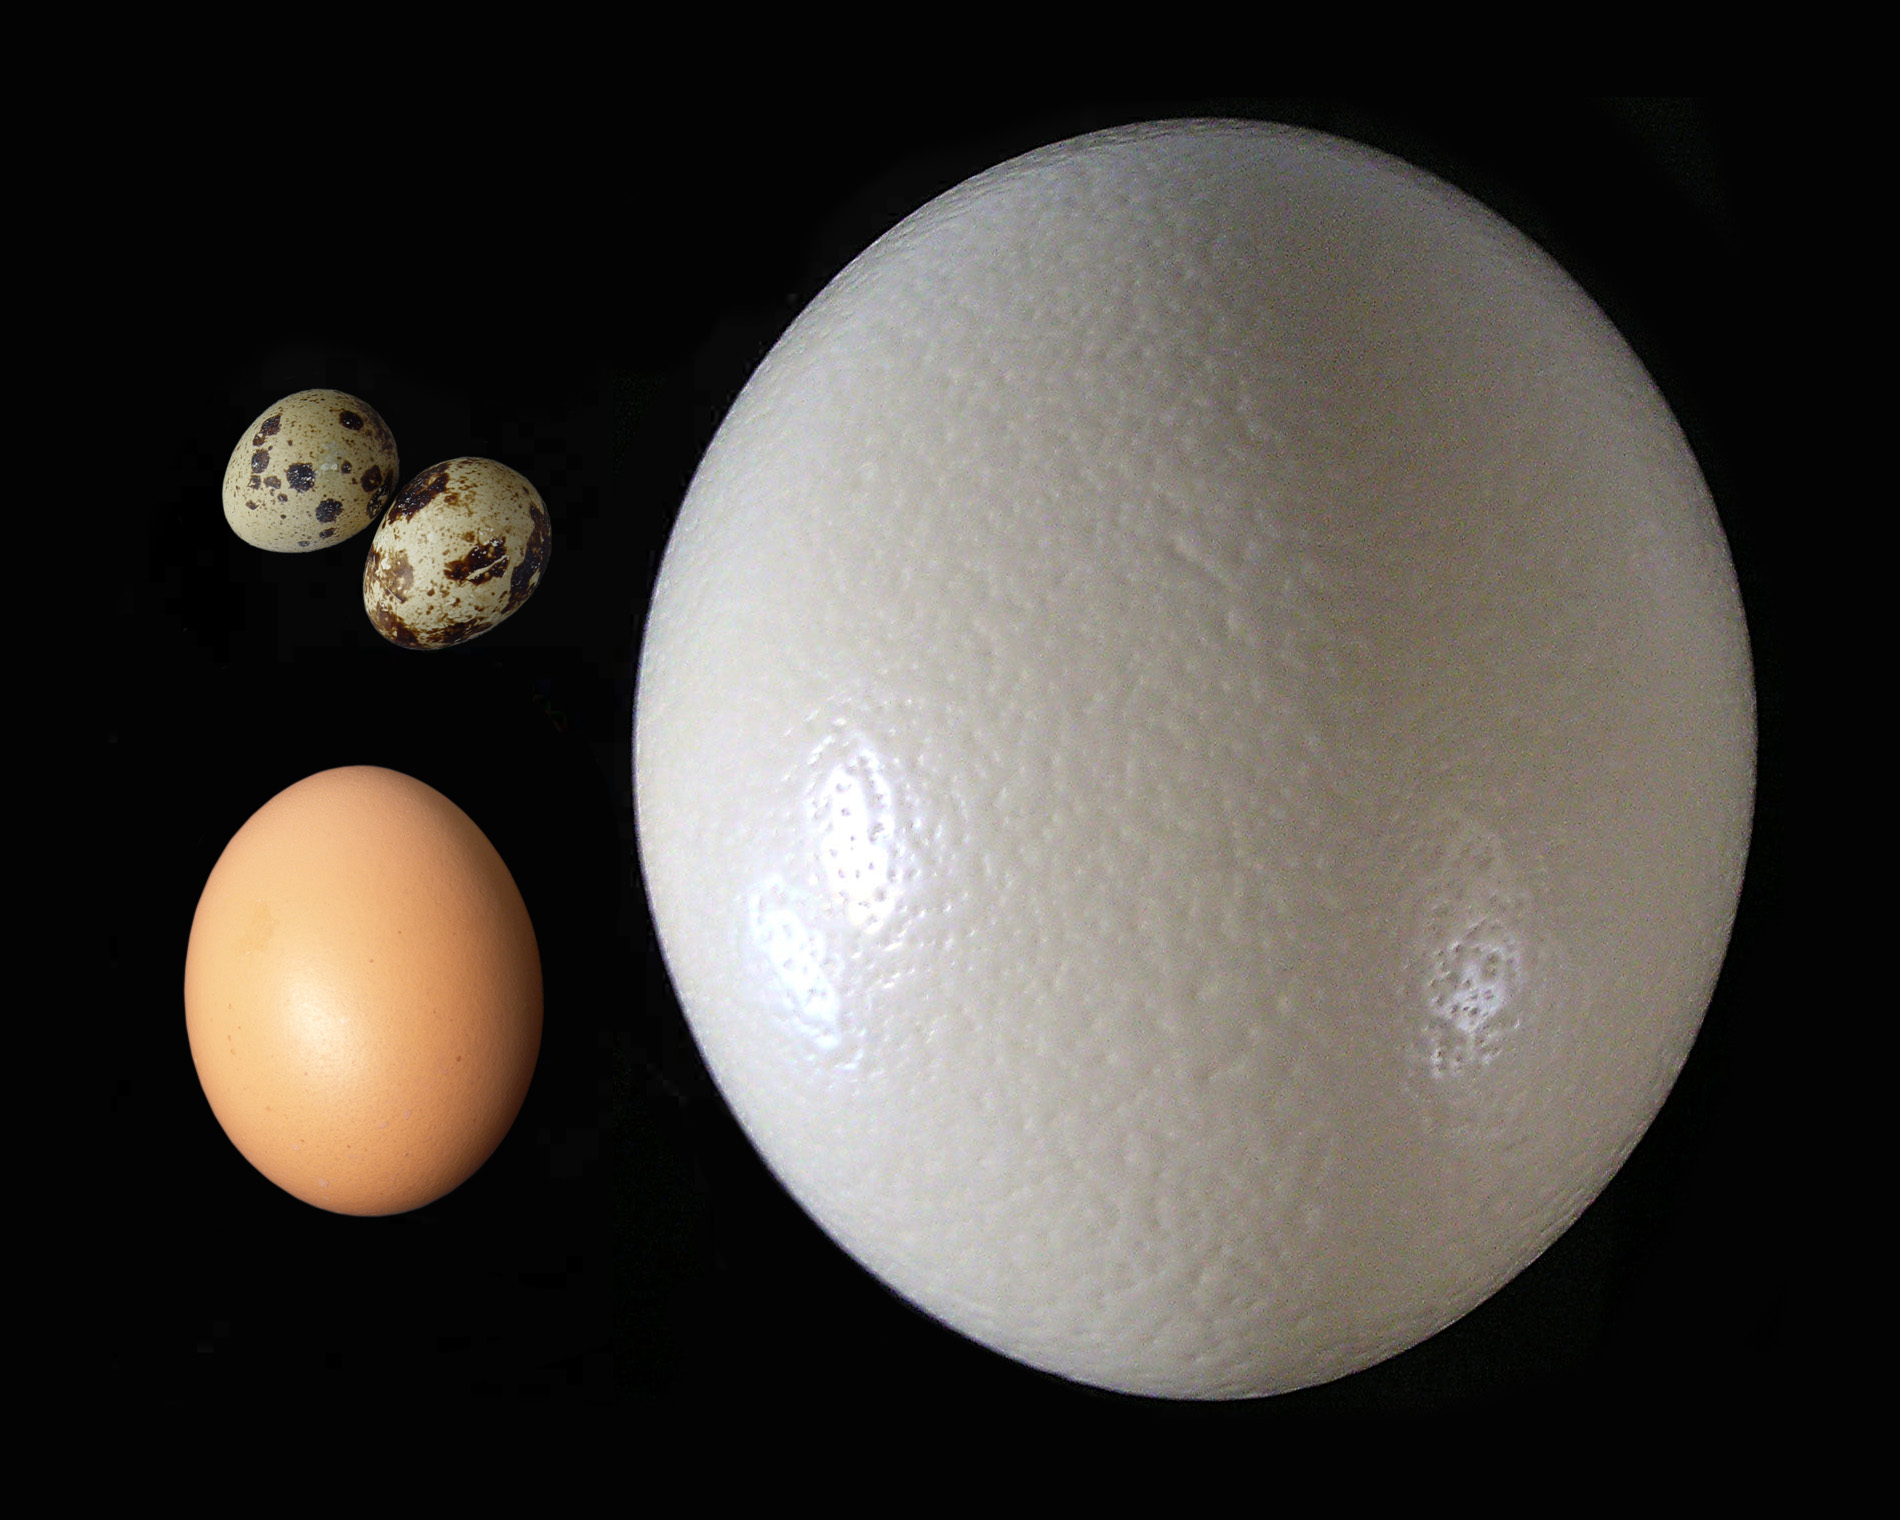

By Rainer Zenz [CC BY-SA 2.5 (https://creativecommons.org/licenses/by-sa/2.5)],
via Wikimedia Commons


In [1]:
from IPython import *         # IPython
from IPython.display import * # Prikaz objekata

## Slika jaja

# Prikaz slike jaja prepelice, kokosi i noja
print('Prepelicja jaja (gore lijevo), kokosje jaje (dolje lijevo) i nojevo '
      'jaje (desno)')
display(Image(filename = 'Vogeleier.jpg', width = 450))
print("By Rainer Zenz "
      "[CC BY-SA 2.5 (https://creativecommons.org/licenses/by-sa/2.5)],\nvia "
      "Wikimedia Commons")


Vrlo jednostavna zatvorena krivulja koja donekle dobro predstavlja presjek jajeta ravninom koja sadrži najdulju spojnicu dvaju točaka na njegovoj ljusci (što ćemo u daljnjem tekstu zvati _silueta jajeta_) jest **elipsa**. U realnom prostoru $ \mathbb{R}^{2} $ implicitna jednadžba elipse oblika je
$$ b^{2} x^{2} + a^{2} y^{2} = a^{2} b^{2} $$
za neke realne parametre $ a , b \in \mathbb{R} $, odnosno za stvarnu elipsu dodatno zahtijevamo $ a b \neq 0 $ (čak i $ a , b > 0 $ jer kao takvi predstavljaju duljine poluosi).

In [2]:
import numpy as np              # numericki racun
import matplotlib.pyplot as plt # grafika

## Graf elipse x^2 + (3 + sqrt(5)) / 2 y^2 = (3 + sqrt(5)) / 2

# Duljine poluosi elipse
a = (1 + np.sqrt(5)) / 2
b = 1
# a : b = phi (zlatni rez)

# Diskretizacija tocaka elipse dobivenih parametrizacijom preko polarnih
# koordinata
x = a * np.cos(np.linspace(0, 2 * np.pi, 128))
y = b * np.sin(np.linspace(0, 2 * np.pi, 128))

# Konstruiranje grafa
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_xlim(-2, 2)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal') # postavljamo omjer 1 : 1 jedinicnih duzina u grafu na x
                       # i y osi da ocuvamo omjer poluosi u zlatnom rezu
ax.set_title(r"Elipsa $ x^{2} + \frac{3 + \sqrt{5}}{2} y^{2} = \frac{3 + "
             r"\sqrt{5}}{2} $")

# Crtanje grafa
ax.plot(x, y)

# Prikaz grafa
plt.show()


Međutim, stvarna silueta jajeta nema dvije osi simetrije, stoga elipsa vjerojatno nije najbolji kandidat za matematički prikaz siluete jajeta.

Gledajući jednom televizijsku emisiju _Na rubu znanosti_ na televizijskom programu _Hrvatske radiotelevizije_ saznao sam da se _prava_ krivulja siluete jajeta dobije presjekom **ravnine** i **eksponencijalnog roga**, a ne **ravnine** i **stošca** --- kako se dobije elipsa. Kratkom internetskom pretragom nisam pronašao jednadžbu siluete jajeta, ali sam pronašao jednadžbu eksponencijalnog roga, stoga sam odlučio sam iz nje konstruirati jednadžbu koja me zanimala.

Eksponencijalni rog skup je točaka u trodimenzionalnom prostoru $ \mathbb{R}^{3} $ dobiven rotacijom grafa eksponencijalne funkcije oko njegove asimptote. Najjednostavniji (s obzirom na smještaj, rotaciju i orijentaciju --- zapravo kojeg zadaje _najjednostavnija_ implicitna jednadžba) eksponencijalni rog zadaje implicitna jednadžba
$$ x^{2} + y^{2} = \exp \left( 2 z \right) \text{.} $$
Što se pak tiče ravnine, za svaku dvodimenzionalnu ravninu u $ \mathbb{R}^{3} $ postoje realni parametri $ A , B , C , D \in \mathbb{R} $ od kojih barem jedan od $ A , B , C $ ne iznosi $ 0 $ tako da tu ravninu zadaje implicitna jednadžba
$$ A x + B y + C z + D = 0 \text{,} $$
a uz takvu parametrizaciju ravnina je paralelna s $ y $-osi ako i samo ako vrijedi $ B = 0 $. S obzirom na to da se svaki položaj nekog eksponencijalnog roga i neke ravnine može dobiti ortogonalnim transformacijama _najjednostavnijeg_ roga i ravnine paralelne s $ y $-osi (dokaz ove tvrdnje nadilazi temu ove zadaće; čitatelje koji ne vjeruju u ovu tvrdnju ohrabrujem da nastave čitati jer su daljnje tvrdnje, osim trivijalnih, dokazane, a, što se tiče ove tvrdnje, neka temu zadaće gledaju kao analizu specijalne klase presjeka) zbog simetričnosti roga i ravnine, proučavat ćemo samo presjeke _najjednostavnijeg_ eksponencijalnog roga i ravnine paralelne s $ y $-osi.

## Matematički račun <a name="racun"></a>

Neka su $ A , C , D \in \mathbb{R} $ proizvoljni takvi da barem jedan od $ A , C $ ne iznosi $ 0 $. U standardnom realnom trodimenzionalnom euklidskom prostoru $ \mathbb{R}^{3} $ definiramo skupove točaka
1. $ E = \left\{ \left( x , y , z \right) \in \mathbb{R}^{3} : x^{2} + y^{2} = \exp \left( 2 z \right) \right\} $ -- eksponencijalni rog,
2. $ \Pi = \left\{ \left( x , y , z \right) \in \mathbb{R}^{3} : A x + C z + D = 0 \right\} $ -- ravnina.

Dobivši presjeke skupova $ E $ i $ \Pi $, točke u ravnini $ \Pi $ htjet ćemo nekako opisati neovisno o početnom prostoru $ \mathbb{R}^{3} $. Formalnije rečeno, želimo pronaći izometriju skupa $ \Pi \subset \mathbb{R}^{3} $ sa standardnim realnim dvodimenzionalnim euklidskim prostorom $ \mathbb{R}^{2} $ i s takvom parametrizacijom ravnine $ \Pi $ pronaći jednadžbu presjeka od interesa. Tražit ćemo izometriju jer izometrija čuva kuteve i udaljenosti, to jest ni ona ni njen inverz ne će _izobličiti_ skupove točaka.

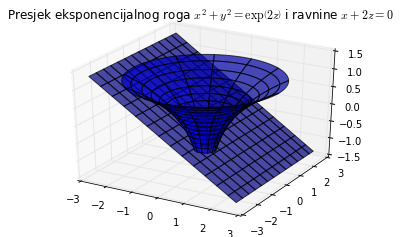

Na slici se na zalost ne vidi dobro da se eksponencijalni rog i ravnina sijeku.
Problem je u tome sto paket matplotlib nije izgraden tako da podrzava
manipulaciju 3D objekata, nego zadani graf odmah generira kao 2D sliku.


In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D # 3-dimenzionalna grafika

## Presjek eksponencijalnog roga i ravnine x + 2 z = 0

# Pomocni parametri za eksponencijalni rog
s = np.linspace(0, 2 * np.pi, 128) # diskretizacija segmenta [0, 2 * pi]
t = np.linspace(-1, 1, 128)        # diskretizacija segmenta [-1, 1]

# Diskretizacija tocaka eksponencijalnog roga dobivenih parametrizacijom preko
# polarnih koordinata
x1 = np.array([np.array([np.exp(t[i]) * np.cos(s[j]) for j in range(128)])
               for i in range(128)])
y1 = np.array([np.array([np.exp(t[i]) * np.sin(s[j]) for j in range(128)])
               for i in range(128)])
z1 = np.array([np.array([t[i] for j in range(128)]) for i in range(128)])

# Pomocni parametri za ravninu
x = np.linspace(-np.e, np.e, 128) # diskretizacija segmenta [-e, e]
y = np.linspace(-np.e, np.e, 128) # diskretizacija segmenta [-e, e]

# Parametri o rotaciji i polozaju ravnine
A = 1
C = 2
D = 0

# Diskretizacija tocaka ravnine
x2, y2 = np.meshgrid(x, y)
z2 = (-D - A * x2) / C

# Konstruiranje grafa
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title(r"Presjek eksponencijalnog roga $ x^{2} + y^{2} = \exp \left( 2 z "
             r"\right) $ i ravnine $ x + 2 z = 0 $")

# Crtanje grafa
ax.plot_surface(x1, y1, z1, alpha = 0.7)
ax.plot_surface(x2, y2, z2, alpha = 0.7)

# Prikaz grafa
plt.show()
print("Na slici se na zalost ne vidi dobro da se eksponencijalni rog i ravnina "
      "sijeku.\nProblem je u tome sto paket matplotlib nije izgraden tako da "
      "podrzava\nmanipulaciju 3D objekata, nego zadani graf odmah generira kao "
      "2D sliku.")


### Implicitna jednadžba <a name="implicitna"></a>

Pretpostavimo da vrijedi $ C = 0 $. Tada je nužno $ A \neq 0 $ (jer smo na početku zahtijevali da barem jedan od $ A , C $ ne iznosi $ 0 $). Promotrimo li definiciju ravnine $ \Pi $, uočavamo da za svaki $ \left( x , y , z \right) \in \mathbb{R}^{3} $ vrijedi $ \left( x , y , z \right) \in \Pi $ ako i samo ako je $ A x + D = 0 $, to jest ako i samo ako je $ x = {- \frac{D}{A}} $. Prilično je očita sada bijekcija $ f \colon \mathbb{R}^{2} \to \Pi $ definirana s
$$ f \left( u , v \right) = \left( {- \frac{D}{A}} , v , u \right) \in \Pi , \quad \forall \left( u , v \right) \in \mathbb{R}^{2} \text{,} $$
koja ne samo da je bijekcija već je i izometrija (prilično je očito da njoj pripadni linearni operator ortonormiranu bazu preslikava u ortonormiranu bazu). Uz takav odabir izometrije ishodište $ \left( 0 , 0 \right) $ preslikava se u projekciju ishodišta $ \left( 0 , 0 , 0 \right) $ na $ \Pi $ u smjeru $ x $-osi, vektor $ \left[ 0 , 1 \right] $ preslikava se u jedinični vektor projekcije vektora $ \left[ 0 , 1 , 0 \right] $ na $ \Pi $ u smjeru $ x $-osi, a vektor $ \left[ 1 , 0 \right] $ preslikava se u jedinični vektor projekcije vektora $ \left[ 0 , 0 , 1 \right] $ na $ \Pi $ u smjeru $ x $-osi.

Pretpostavimo sada da vrijedi $ C \neq 0 $. Bez smanjenja općenitosti možemo pretpostaviti da vrijedi $ C > 0 $ jer, ako vrijedi $ C < 0 $, jednadžba $ A x + C z + D = 0 $ ekvivalentna je jednadžbi $ {- A} x + \left( {- C} \right) z + \left( {- D} \right) = 0 $ u kojoj za parametar $ {- C} $ vrijedi $ {- C} > 0 $. Uvrstimo li koordinate točke $ T_{0} = \left( 0 , 0 , {- \frac{D}{C}} \right) $ u definiciju ravnine $ \Pi $, vidimo da je $ T_{0} \in \Pi $. Međutim, kako se $ y $ koordinata u implicitnoj jednadžbi ravnine $ \Pi $ ne pojavljuje, vrijedi i $ T_{2} = \left( 0 , 1 , {- \frac{D}{C}} \right) \in \Pi $. Dakle, jedinični vektor $ e_{2} = \overrightarrow{T_{0} T_{2}} = \left[ 0 , 1 , 0 \right] $ u smjeru je ravnine $ \Pi $. Uvrstimo li pak koordinate točke $ T_{1} = \left( 1 , 0 , {- \frac{A + D}{C}} \right) $ u definiciju ravnine $ \Pi $ vidimo da je i $ T_{1} \in \Pi $ (a očito je i $ T_{1} \neq T_{0} $, dakle $ \overrightarrow{T_{0} T_{1}} \neq \overrightarrow{0} $), a tada je i jedinični vektor $ e_{1} = \frac{\overrightarrow{T_{0} T_{1}}}{\left\Vert \overrightarrow{T_{0} T_{1}} \right\Vert} = \left[ \frac{C}{\sqrt{A^{2} + C^{2}}} , 0 , {- \frac{A}{\sqrt{A^{2} + C^{2}}}} \right] $ u smjeru ravnine $ \Pi $.

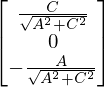

In [4]:
import sympy as sym # simbolicki racun
sym.init_printing()

## Normiranje vektora T_0 T_1

# Parametri o rotaciji i polozaju ravnine
A = sym.Symbol('A', reals = True)
C = sym.Symbol('C', reals = True, positive = True) # dodatna pretpostavka C > 0
D = sym.Symbol('D', reals = True)

# Tocke T_0 i T_1 u ravnini
T0 = sym.Matrix([0, 0, -D / C])       # tocka T_0
T1 = sym.Matrix([1, 0, -(A + D) / C]) # tocka T_1

# Vektor T_0 T_1
v1 = T1 - T0
N = sym.sqrt(v1.dot(v1)) #norma

# Prikaz normiranog vektora
display(sym.together(v1 / N))


Jedinični vektori $ e_{1} , e_{2} $ međusobno su ortogonalni (lako se vidi da im skalarni umnožak iznosi $ 0 $ jer se svaka nenul-vrijednost iz koordinata jednog vektora u skalarnom umnošku množi s nul-vrijednosti iz koordinata drugog vektora), u smjeru ravnine $ \Pi $ su i dvoje ih je, kolika je i dimenzija ravnine $ \Pi $. Dakle, ravnina $ \Pi $ može se opisati i kao $ \Pi = \left\{ T_{0} + u e_{1} + v e_{2} : \left( u , v \right) \in \mathbb{R}^{2} \right\} $. Prirodno se nameće bijekcija $ g \colon \mathbb{R}^{2} \to \Pi $ definiana s
$$ g \left( u , v \right) = T_{0} + u e_{1} + v e_{2} = \left( \frac{C}{\sqrt{A^{2} + C^{2}}} u , v , {- \frac{D}{C}} - \frac{A}{\sqrt{A^{2} + C^{2}}} u \right) \in \Pi , \quad \forall \left( u , v \right) \in \mathbb{R}^{2} \text{,} $$
koja je ujedno i izometrija jer njoj pripadni linearni operator ortonormiranu bazu preslikava u ortonormiranu bazu. Funkcija $ g $ ishodište $ \left( 0 , 0 \right) $ preslikava u projekciju ishodišta $ \left( 0 , 0 , 0 \right) $ na $ \Pi $ u smjeru $ z $-osi, vektor $ \left[ 0 , 1 \right] $ preslikava u jedinični vektor projekcije vektora $ \left[ 0 , 1 , 0 \right] $ na $ f $ u smjeru $ z $-osi, a vektor $ \left[ 1 , 0 \right] $ preslikava u jedinični vektor projekcije vektora $ \left[ 1 , 0 , 0 \right] $ na $ \Pi $ u smjeru $ z $-osi.

U slučaju $ C = 0 $ projekcija ishodišta $ \left( 0 , 0 , 0 \right) $ na $ \Pi $ u smjeru $ x $-osi također je njegova ortogonalna projekcija na $ \Pi $. Naime, ravnina $ \Pi $ zapravo je samo translacija $ y z $-ravnine, čiji je ortogonalni komplement $ x $-os.

U slučaju $ C \neq 0 $ dobivenu izometriju možemo translatirati (komponirati slijeva s translacijom) tako da se ishodište $ \left( 0 , 0 \right) $ preslikava u ortogonalnu projekciju ishodišta $ \left( 0 , 0 , 0 \right) $ na $ \Pi $ --- u točku $ \left( {- \frac{A D}{A^{2} + C^{2}}} , 0 , {- \frac{C D}{A^{2} + C^{2}}} \right) \in \Pi $.

Uvrstavanjem koordinata tocke OP


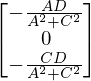

kao navodne ortogonalne projekcije tocke O


u jednadzbu ravnine Pi


dobijemo istinitost


dakle, OP se nalazi u ravnini Pi.
Nadalje, za vektor O OP


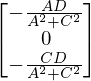

skalarni produkt s 1. vektorom baze smjera ravnine Pi


iznosi


a skalarni produkt s 2. vektorom baze smjera ravnine Pi


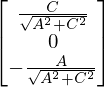

iznosi


to jest vektor O OP uistinu jest okomit na ravninu Pi


In [5]:
## Demonstracija cinjenice da je (-A D / (A^2 + C^2), 0, -C D / (A^2 + C^2))
## ortogonalna projekcija ishodista na ravninu Pi

# Parametri o rotaciji i polozaju ravnine
A = sym.Symbol('A', reals = True)
C = sym.Symbol('C', reals = True)
D = sym.Symbol('D', reals = True)

# Ortonormirana baza smjera ravnine Pi
e1 = sym.Matrix([0, 1, 0])
e2 = sym.Matrix([C / sym.sqrt(A ** 2 + C ** 2),
                 0,
                 -A / sym.sqrt(A ** 2 + C ** 2)])

# Ishodiste i tocka za koju tvrdimo da je ortogonalna projekcija ishodista na
# ravninu Pi
O = sym.Matrix([0, 0, 0])
OP = sym.Matrix([-A * D / (A ** 2 + C ** 2), 0, -C * D / (A ** 2 + C ** 2)])

# Vektor O OP
v = OP - O

# Demonstracija da se tocka OP nalazi u ravnini Pi
print('Uvrstavanjem koordinata tocke OP')
display(OP)
print('kao navodne ortogonalne projekcije tocke O')
display(O)
print('u jednadzbu ravnine Pi')
display(sym.Eq(A * sym.Symbol('x') + C * sym.Symbol('z') + D, 0,
               evaluate = False))
print('dobijemo istinitost')
display(sym.Eq(sym.together(A * OP[0] + 0 * OP[1] + C * OP[2] + D), 0,
               evaluate = True))
print('dakle, OP se nalazi u ravnini Pi.')

# Demonstracija da je vektor O OP okomit na ravninu Pi
print('Nadalje, za vektor O OP')
display(v)
print('skalarni produkt s 1. vektorom baze smjera ravnine Pi')
display(e1)
print('iznosi')
display(v.dot(e1))
print('a skalarni produkt s 2. vektorom baze smjera ravnine Pi')
display(e2)
print('iznosi')
display(v.dot(e2))
print('to jest vektor O OP uistinu jest okomit na ravninu Pi')


Dakle, ravninu $ \Pi $ možemo zadati i kao
$$ \Pi = \left\{ \left( {- \frac{A D}{A^{2} + C^{2}}} + \frac{C}{\sqrt{A^{2} + C^{2}}} u , v , {- \frac{C D}{A^{2} + C^{2}}} - \frac{A}{\sqrt{A^{2} + C^{2}}} u \right) \in \mathbb{R}^{3} : \left( u , v \right) \in \mathbb{R}^{2} \right\} \text{.} $$
U biti, uvrštavanjem $ C = 0 $ primijećujemo da je to ekvivalentno gore opisanoj izometriji u slučaju $ C = 0 $ do na predznak faktora uz $ u $ --- prigodno je što simetrije, kao izometrije, ne kvare izometričnost preslikavanja s kojima ih komponiramo.

Konačno, neovisno o tome je li $ C = 0 $ ili $ C \neq 0 $ i neovisno o predznacima parametara $ A , C $ funkcija $ h \colon \mathbb{R}^{2} \to \Pi $ definirana s
$$ h \left( u , v \right) = \left( {- \frac{A D}{A^{2} + C^{2}}} + \frac{C}{\sqrt{A^{2} + C^{2}}} u , v , {- \frac{C D}{A^{2} + C^{2}}} - \frac{A}{\sqrt{A^{2} + C^{2}}} u \right) \in \Pi , \quad \forall \left( u , v \right) \in \mathbb{R}^{2} $$
izometrija je prostora $ \mathbb{R}^{2} $ i ravnine $ \Pi $ koja ishodište $ \left( 0 , 0 \right) $ preslikava u ortogonalnu projekciju ishodišta $ \left( 0 , 0 , 0 \right) $ na $ \Pi $.

Pronašavši ovakve izometrije, preostaje odrediti presjek skupova $ E $ i $ \Pi $. Presjek možemo definirati kao $ E \cap \Pi = \left\{ T \in \mathbb{R}^{3} : T \in E \land T \in \Pi \right\} $, ali praktičnija nam je definicija $ E \cap \Pi = \left\{ T \in \Pi : T \in E \right\} $, to jest presjek čine one točke u ravnini koje zadovoljavaju implicitnu jednadžbu eksponencijalnog roga. Time dolazimo do implicitne jednadžbe presjeka
$$ E \cap \Pi = \left\{ \left( {- \frac{A D}{A^{2} + C^{2}}} + \frac{C}{\sqrt{A^{2} + C^{2}}} u , v , {- \frac{C D}{A^{2} + C^{2}}} - \frac{A}{\sqrt{A^{2} + C^{2}}} u \right) \in \mathbb{R}^{3} : \left( \frac{C}{\sqrt{A^{2} + C^{2}}} u - \frac{A D}{A^{2} + C^{2}} \right)^{2} + v^{2} = \exp \left( 2 \left( {- \frac{A}{\sqrt{A^{2} + C^{2}}}} u - \frac{C D}{A^{2} + C^{2}} \right) \right) \right\} \text{.} $$

Ako označimo s $ \varphi \in \left[ 0 , \frac{\pi}{2} \right] $ neusmjereni kut između ravnine $ \Pi $ i $ x y $-ravnine (to jest $ \varphi = 0 $ ako su ravnine paralelne), vrijedi
$$ \begin{align} \cos \left( \varphi \right) & = \left| \frac{C}{\sqrt{A^{2} + C^{2}}} \right| \text{,} \\ \sin \left( \varphi \right) & = \left| {- \frac{A}{\sqrt{A^{2} + C^{2}}}} \right| \text{.} \end{align} $$
Za $ \varphi \in \left[ 0 , \pi \right) $ usmjereni kut (u pozitivnom smjeru počevši od $ x y $-ravnine) vrijedi čak
$$ \begin{align} \cos \left( \varphi \right) & = I \cdot \frac{C}{\sqrt{A^{2} + C^{2}}} \text{,} \\ \sin \left( \varphi \right) & = I \left( {- \frac{A}{\sqrt{A^{2} + C^{2}}}} \right) \end{align} $$
za $ I \in \left\{ {- 1} , 1 \right\} $ takav da je $ I \left( {- \frac{A}{\sqrt{A^{2} + C^{2}}}} \right) > 0 $ ako je $ {- \frac{A}{\sqrt{A^{2} + C^{2}}}} \neq 0 $ odnosno da je $ I \cdot \frac{C}{\sqrt{A^{2} + C^{2}}} = 1 $ inače. Ako označimo s $ \rho = {- \frac{D}{\sqrt{A^{2} + C^{2}}}} \in \mathbb{R} $, vrijedi $ d \left( \left( 0 , 0 , 0 \right) , \Pi \right) = \left| \rho \right| $.

Usporedba korijena kvadrata (apsolutne vrijednosti) vrijednosti


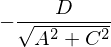

i norme vektora


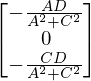

rezultira istinitoscu


Iz nekog razloga, ako umjesto korijena kvadrata eksplicitno zahtijevamo
apsolutnu vrijednost, ispisuje se jednadzba


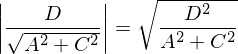

koja je ocito istinita (tim vise sto je zadano da su A, C i D realni brojevi)


In [6]:
## Demonstracija da je ravnina Pi udaljena od ishodista za |-D / (A^2 + C^2)|

# Parametri o rotaciji i polozaju ravnine
A = sym.Symbol('A', reals = True)
C = sym.Symbol('C', reals = True)
D = sym.Symbol('D', reals = True)

# Pomocna oznaka rho
rho = -D / sym.sqrt(A ** 2 + C ** 2)

# Ishodiste i njegova ortogonalna projekcija na ravninu Pi
O = sym.Matrix([0, 0, 0])
OP = sym.Matrix([-A * D / (A ** 2 + C ** 2), 0, -C * D / (A ** 2 + C ** 2)])

# Vektor O OP
v = OP - O

# Demonstracija jednakosti sqrt(rho^2) = sqrt((v|v)) odnosno |rho| = sqrt((v|v))
print('Usporedba korijena kvadrata (apsolutne vrijednosti) vrijednosti')
display(rho)
print('i norme vektora')
display(v)
print('rezultira istinitoscu')
display(sym.Eq(sym.sqrt(rho ** 2), sym.together(sym.sqrt(v.dot(v))), evaluate = True))
print("Iz nekog razloga, ako umjesto korijena kvadrata eksplicitno zahtijevamo"
      "\napsolutnu vrijednost, ispisuje se jednadzba")
display(sym.Eq(sym.Abs(rho), sym.together(sym.sqrt(v.dot(v))), evaluate = True))
print('koja je ocito istinita (tim vise sto je zadano da su A, C i D realni '
      'brojevi)')


Obratno, za proizvoljne $ \varphi \in \left[ 0 , 2 \pi \right) $ i $ \rho \in \mathbb{R} $ jednadžba
$$ {- \sin \left( \varphi \right)} x + \cos \left( \varphi \right) z - \rho = 0 $$
zadaje ravninu u $ \mathbb{R}^{2} $ paralelnu s $ y $-osi.

Označimo sada kut $ \varphi \in \left[ 0 , 2 \pi \right) $ takav da vrijedi
$$ \begin{align} \cos \left( \varphi \right) & = \frac{C}{\sqrt{A^{2} + C^{2}}} \text{,} \\ \sin \left( \varphi \right) & = {- \frac{A}{\sqrt{A^{2} + C^{2}}}} \text{,} \end{align} $$
i označimo $ \rho = {- \frac{D}{\sqrt{A^{2} + C^{2}}}} \in \mathbb{R} $. Time definicija presjeka postaje kudikamo jednostavnija
$$ E \cap \Pi = \left\{ \left( {- \sin \left( \varphi \right)} \rho + \cos \left( \varphi \right) u , v , \cos \left( \varphi \right) \rho + \sin \left( \varphi \right) u \right) \in \mathbb{R}^{3} : \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) \right\} \text{.} $$

<a name="jednadzba"></a>**Dakle, za zadane $ \left( \varphi , \rho \right) \in \left[ 0 , 2 \pi \right) \times \mathbb{R} $ implicitna jednadžba
$$ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) $$
zadaje skup točaka u dvodimenzionalnom realnom ortogonalnom Kartezijevom koordinatnom sustavu od $ u $- i $ v $-osi koji predstavlja presjek eksponencijalnog roga i ravnine**.

Neka su $ \left( \varphi , \rho \right) \in \left[ \pi , 2 \pi \right) \times \mathbb{R} $ proizvoljni. Označimo s $ \vartheta = \varphi - \pi \in \left[ 0 , \pi \right) $ i $ \xi = {- \rho} \in \mathbb{R} $ za koje tada vrijedi da su jednadžbe
$$ \left( \cos \left( \vartheta \right) \left( {- u} \right) - \sin \left( \vartheta \right) \xi \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \vartheta \right) \left( {- u} \right) + \cos \left( \vartheta \right) \xi \right) \right) $$
(što je, uočimo, zrcaljenje s obzirom na $ v $-os presjeka ravnine zadane jednadžbom $ {- \sin \left( \vartheta \right)} x + \cos \left( \vartheta \right) z - \xi = 0 $ i eksponencijalnog roga) i
$$ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) $$
ekvivalentne.

In [7]:
## Demonstracija da su jednadzbe
##     (cos(phi - pi) (-u) - sin(phi - pi) (-rho))^2 + v^2 =
##     = exp(2 (sin(phi - pi) (-u) + cos(phi - pi) (-rho)))
## i
##     (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))
## ekvivalentne

# Parametri phi, rho
phi = sym.Symbol(r"\varphi", reals = True)
rho = sym.Symbol(r"\rho", reals = True)

# Realna varijabla u
u = sym.Symbol('u', reals = True)

# Realne varijable theta, xi
theta = sym.Symbol(r"\vartheta", reals = True)
xi = sym.Symbol(r"\xi", reals = True)

# Demonstarcija jednakosti izraza (cos(phi) u - sin(phi) rho)^2 i
# (cos(phi - pi) u - sin(phi - pi) rho)^2 odnosno izraza
# exp(2 (sin(phi) u + cos(phi) rho)) i
# exp(-2 (sin(phi - pi) u + cos(phi - pi) rho))
print('Supstitucijama')
display(sym.Eq(theta, phi - sym.pi, evaluate = False))
display(sym.Eq(xi, -rho, evaluate = False))
print('usporedba izraza')
display(sym.Eq((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2,
               (sym.cos(theta) * -u - sym.sin(theta) * xi) ** 2,
                evaluate = False))
print('rezultira istinitoscu')
display(sym.Eq(sym.expand((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2,
                          trig = True),
               sym.expand(((sym.cos(theta) * -u - sym.sin(theta) * xi) ** 2).
                              subs({theta : phi - sym.pi, xi : -rho}),
                          trig = True),
               evaluate = True))
print('a izraza')
display(sym.Eq(sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
               sym.exp(2 * (sym.sin(theta) * -u + sym.cos(theta) * xi)),
               evaluate = False))
print('istinitoscu')
display(sym.Eq(sym.expand(sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
                          trig = True),
               sym.expand((sym.exp(2 * (sym.sin(theta) * -u +
                                        sym.cos(theta) * xi))).
                              subs({theta : phi - sym.pi, xi : -rho}),
                          trig = True),
               evaluate = True))


Supstitucijama


usporedba izraza


rezultira istinitoscu


a izraza


istinitoscu


Neka su sada $ \left( \varphi , \rho \right) \in \left( \frac{\pi}{2} , \pi \right) \times \mathbb{R} $ rpoizvoljni. Označimo s $ \vartheta = \pi - \varphi \in \left( 0 , \frac{\pi}{2} \right) $ i $ \xi = {- \rho} \in \mathbb{R} $ za koje su tada jednadžbe
$$ \left( \cos \left( \vartheta \right) u - \sin \left( \vartheta \right) \xi \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \vartheta \right) u + \cos \left( \vartheta \right) \xi \right) \right) $$
(što je, uočimo, presjek ravnine zadane jednadžbom $ {- \sin \left( \vartheta \right)} x + \cos \left( \vartheta \right) z - \xi = 0 $ i eksponencijalnog roga) i
$$ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) $$
ekvivalentne.

In [8]:
## Demonstracija da su jednadzbe
##     (cos(pi - phi) u - sin(pi - phi) (-rho))^2 + v^2 =
##     = exp(2 (sin(pi - phi) u + cos(pi - phi) (-rho)))
## i
##     (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))
## ekvivalentne

# Parametri phi, rho
phi = sym.Symbol(r"\varphi", reals = True)
rho = sym.Symbol(r"\rho", reals = True)

# Realna varijabla u
u = sym.Symbol('u', reals = True)

# Realne varijable theta, xi
theta = sym.Symbol(r"\vartheta", reals = True)
xi = sym.Symbol(r"\xi", reals = True)

# Demonstarcija jednakosti izraza (cos(phi) u - sin(phi) rho)^2 i
# (cos(pi - phi) u - sin(pi - phi) (-rho))^2 odnosno izraza
# exp(2 (sin(phi) u + cos(phi) rho)) i
# exp(2 (sin(pi - phi) u + cos(pi - phi) (-rho)))
print('Supstitucijama')
display(sym.Eq(theta, sym.pi - phi, evaluate = False))
display(sym.Eq(xi, -rho, evaluate = False))
print('usporedba izraza')
display(sym.Eq((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2,
               (sym.cos(theta) * u - sym.sin(theta) * xi) ** 2,
                evaluate = False))
print('rezultira istinitoscu')
display(sym.Eq(sym.expand((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2,
                          trig = True),
               sym.expand(((sym.cos(theta) * u - sym.sin(theta) * xi) ** 2).
                              subs({theta : sym.pi - phi, xi : -rho}),
                          trig = True),
               evaluate = True))
print('a izraza')
display(sym.Eq(sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
               sym.exp(2 * (sym.sin(theta) * u + sym.cos(theta) * xi)),
               evaluate = False))
print('istinitoscu')
display(sym.Eq(sym.expand(sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
                          trig = True),
               sym.expand((sym.exp(2 * (sym.sin(theta) * u +
                                        sym.cos(theta) * xi))).
                              subs({theta : sym.pi - phi, xi : -rho}),
                          trig = True),
               evaluate = True))


Supstitucijama


usporedba izraza


rezultira istinitoscu


a izraza


istinitoscu


Budući da zrcaljenje s obzirom na koordinantne osi ne samo da je izometrija nego su jedine razlike u implicitnim jednadžbama početnog skupa i njemu zrcalnog skupa predznaci koordinatnih varijabli (i kao takvo nije interesantno), zaključujemo da je svaki presjek ravnine paralelne s $ y $-osi i eksponencijalnog roga $ x^{2} + y^{2} = \exp \left( 2 z \right) $ do na ortogonalne transformacije jednak nekom presjeku takvom da vrijedi $ \varphi \in \left[ 0 , \frac{\pi}{2} \right] $ (na početku smo tvrdili da se pak ortogonalnim transformacijama svaki ravnina i eksponencijalni rog mogu dovesti u taj položaj pa iz činjenice da je kompozicija ortogonalnih transformacija ortogonalna transformacija slijedi da je svaki presjek ravnine i eksponencijalnog roga do na ortogonalne transformacije jednak nekom presjeku s ovakvim parametrima).

Pretpostavimo sada da za početne $ A , C , D \in \mathbb{R} $ vrijedi $ A C \neq 0 $. Pretpostavimo, dodatno, da je ravnina $ \Pi $ tangencijalna eksponencijalnom rogu $ E $ tako da joj je $ u $-os (u gore opisanoj izometriji) tangenta na $ E $ (to je zapravo i jedina mogućnost da je ravnina $ \Pi $ tangencijalna eksponencijalnom rogu $ E $ ako je $ \Pi $ paralelna s $ y $-osi).

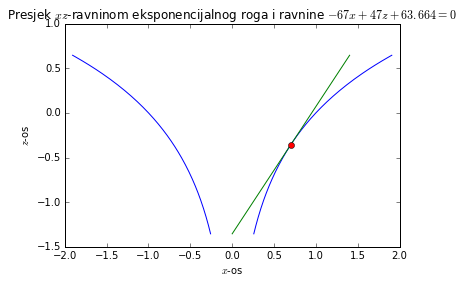

In [9]:
## Tangencijalni polozaj ravnine A x + C z + D = 0 i eksponencijalnog roga

# Parametri o polozaju i nagibu ravnine
A = -np.random.randint(1, 101)
C = np.random.randint(1, 101)
D = C * (1 + np.log(abs(float(A) / C))) # Za ovakav i samo za ovakav D ravnina
                                         # je tangencijalna eksponencijalnom
                                         # rogu

# Diskretizacija tocaka "eksponencijalnog roga" i "ravnine" (to jest njihovih
# tocaka u xz-ravnini)
z = np.linspace(np.log(abs(float(C) / A)) - 1,
                np.log(abs(float(C) / A)) + 1,
                128)
x1 = -np.exp(z)
x2 = np.exp(z)
x = -(C * z + D) / A

# Kosntruiranje grafa
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
if D < 0:
    ax.set_title("Presjek $ x z $-ravninom eksponencijalnog roga i ravnine $ " +
                 "{0:d}".format(A) + " x + " + "{0:d}".format(C) + " z - " +
                 "{0:.3f}".format(-D) + " = 0 $")
else:
    ax.set_title("Presjek $ x z $-ravninom eksponencijalnog roga i ravnine $ " +
                 "{0:d}".format(A) + " x + " + "{0:d}".format(C) + " z + " +
                 "{0:.3f}".format(D) + " = 0 $")
ax.set_xlabel('$ x $-os')
ax.set_ylabel('$ z $-os')

# Crtanje grafa
ax.plot(x1, z, 'b-')
ax.plot(x2, z, 'b-')
ax.plot(x, z, 'g-')
ax.plot(abs(-float(C) / A), np.log(abs(-float(C) / A)), 'ro')

# Prikaz grafa
plt.show()


Presjekom u $ x z $-ravnini eksponencijalni rog tada čine grafovi funkcija $ \log \circ {- x} \colon \left( {- \infty} , 0 \right) \to \mathbb{R} $ i $ \log \colon \left( 0 , {+ \infty} \right) \to \mathbb{R} $, a ravninu graf funkcije $ z \colon \mathbb{R} \to \mathbb{R} $ definirane sa $ z \left( x \right) = {- \frac{A x + D}{C}} $. Ako je $ z $ tangenta (a što smo pretpostavili da jest) na neku od _grana_ eksponencijalnog roga, onda postoji $ x_{0} \in \mathbb{R} $ takav da vrijedi
$$ \begin{align} \log \left( \left| x_{0} \right| \right) & = {- \frac{A x + D}{C}} \text{,} \\ \frac{\mathrm{d}}{\mathrm{d} \ x} \log \left( \left| x \right| \right) \left( x_{0} \right) & = {- \frac{A}{C}} \text{.} \end{align} $$
Iz druge jednakosti dobijemo $ x_{0} = {\pm \frac{C}{A}} $, a uvrštavanjem u prvu dobijemo da vrijedi
$$ D = C \left( 1 - \log \left( \left| \frac{C}{A} \right| \right) \right) \text{,} $$
to jest
$$ D = C \left( 1 + \log \left( \left| \frac{A}{C} \right| \right) \right) \text{.} $$
Uistinu, za $ A = 0 $ ili $ C = 0 $ gornja _formula_ nije definirana, ali u tim slučajevima ni ne postoji $ D \in \mathbb{R} $ takav da je ravnina tangencijalna eksponencijalnom rogu zato što eksponencijalni rog nema horizontalnu ($ A = 0 $) ni vertikalnu ($ C = 0 $) tangencijalnu ravninu jer je eksponencijalna funkcija strogo rastuća i definirana na cijelom $ \mathbb{R} $.

Za $ \left( \varphi , \rho \right) \in \left( \left[ 0 , 2 \pi \right) \setminus \left\{ 0 , \frac{\pi}{2} , \pi , \frac{3 \pi}{2} \right\} \right) \times \mathbb{R} $ ravnina $ {- \sin \left( \varphi \right)} x + \cos \left( \varphi \right) z - \rho = 0 $ je tangencijalna eksponencijalnom rogu ako je
$$ \rho = {- \cos \left( \varphi \right)} \left( 1 + \log \left( \left| \tan \left( \varphi \right) \right| \right) \right) \text{.} $$

Neka su $ \left( \varphi , \rho \right) \in \left[ 0 , \frac{\pi}{2} \right] \times \mathbb{R} $ proizvoljni. Promatramo li jednadžbu
$$ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) $$
za fiksirani $ u \in \mathbb{R} $, vrijednost $ v $ može se numerički _jednostavno_ izračunati (pod pretpostavkom da znamo efikasno numerički izračunati sve ostale izraze, kao na primjer $ \exp \left( 2 \left( \sin \left( \varphi \right) u - \cos \left( \varphi \right) \rho \right) \right) $, koji je za _gotovo sve_ vrijednosti $ \varphi , \rho , u $ transcendentni broj) --- jednostavno u smislu da je to obično rješenje kvadratne jednadžbe.

Za fiksne parametre


i za fiksni


jednadzbu


zadovoljava


s vrijednosti


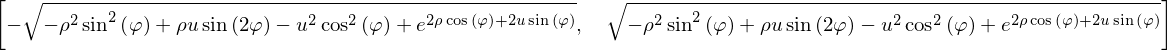

ako je definirana.


In [10]:
## Trazenje vrijednosti v koja za fiksne phi, rho, u zadovoljava jednadzbu
##     (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))

# Parametri phi, rho
phi = sym.Symbol(r"\varphi", reals = True)
rho = sym.Symbol(r"\rho", reals = True)

# Realne varijable u, v
u = sym.Symbol('u', reals = True)
v = sym.Symbol('v', reals = True)

# Jednadzba
# (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))
jedn = sym.Eq((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2 + v ** 2,
              sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
              evaluate = False)

# Rjesavanje jednadzbe jedn po v
print('Za fiksne parametre')
display(phi, rho)
print('i za fiksni')
display(u)
print('jednadzbu')
display(jedn)
print('zadovoljava')
display(v)
print('s vrijednosti')
display(sym.solve(jedn, v))
print('ako je definirana.')


Iz tog rješenja vidimo da je i skup zadan implicitnom jednadžbom $ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) $ simetričan s obzirom na $ u $-os. S druge strane, za fiksni $ v $ jednadžbu je _nešto kompliciranije_ riješiti po $ u $.

Za fiksne parametre


i za fiksni


jednadzbu


zadovoljava


s vrijednosti


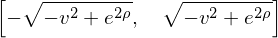

za


odnosno


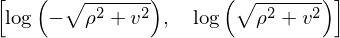

(kako su nam u domeni samo realni brojevi, logaritam negativnog broja nas "ne
zanima") za


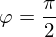

odnosno


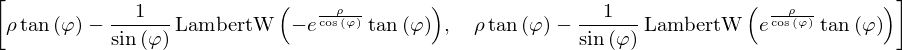

za


ako su izrazi definirani.
Ako bi nas zanimala vrijednost koja jednadzbu zadovoljava za proizvoljne


i proizvoljni


njeno rjesavanje preko SymPy paketa rezultiralo bi iznimkom
multiple generators [u, exp(u*sin(\varphi))]
No algorithms are implemented to solve equation v**2 + (-\rho*sin(\varphi) + u*cos(\varphi))**2 - exp(2*\rho*cos(\varphi) + 2*u*sin(\varphi))


In [11]:
## Trazenje vrijednosti u koja za fiksne phi, rho, v zadovoljava jednadzbu
##     (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))

# Parametri phi, rho
phi = sym.Symbol(r"\varphi", reals = True)
rho = sym.Symbol(r"\rho", reals = True)

# Realne varijable u, v
u = sym.Symbol('u', reals = True)
v = sym.Symbol('v', reals = True)

# Jednadzba
# (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))
jedn = sym.Eq((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2 + v ** 2,
              sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
              evaluate = False)

# Rjesavanje jednadzbe jedn po u
print('Za fiksne parametre')
display(phi, rho)
print('i za fiksni')
display(v)
print('jednadzbu')
display(jedn)
print('zadovoljava')
display(u)
print('s vrijednosti')
display(sym.solve(jedn.subs({phi : 0}), u))
print('za')
display(sym.Eq(phi, 0, evaluate = False))
print('odnosno')
display(sym.solve(jedn.subs({phi : sym.pi / 2}), u))
print("(kako su nam u domeni samo realni brojevi, logaritam negativnog broja "
      "nas \"ne\nzanima\") za")
display(sym.Eq(phi, sym.pi / 2, evaluate = False))
print('odnosno')
display(sym.solve(jedn.subs(v, 0), u))
print('za')
display(sym.Eq(v, 0, evaluate = False))
print('ako su izrazi definirani.')

# Demonstracija da se paketom SymPy opci slucaj ne moze rijesiti
print('Ako bi nas zanimala vrijednost koja jednadzbu zadovoljava za '
      'proizvoljne')
display(phi, rho)
print('i proizvoljni')
display(v)
print('njeno rjesavanje preko SymPy paketa rezultiralo bi iznimkom')
try:
    sym.solve(jedn, u)
except NotImplementedError as exc:
    print(exc)


Osobno ne vjerujem ni da su ova rješenja točna (kompletna). Ako početna ravnina nije paralelna s $ x y $-osi i nije tangencijalna na eksponencijalni rog, a postoje barem dvije točke na $ u $-osi (kada ravninu parametriziramo preko gore spomenutih izometrija) koje pripadaju eksponencijalnom rogu, onda postoje točno tri točke na $ u $ osi koje pripadaju eksponencijalnom rogu zbog simetričnosti rotacionog tijela, beskonačnosti ravnine i zato što eksponencijalna funkcija raste brže od linearne (afine). Dakle, u općem slučaju bi trebale postojati tri _rješenja_ nultočki (vrijednosti $ u $ za koje $ v = 0 $ zadovoljava jednadžbu), a koliko ih stvarno ima da ovisi o definiranosti njihovih izraza s obzirom na $ \varphi $ i $ \rho $.

Neka je $ \varphi \in \left( 0 , \frac{pi}{2} \right) $ proizvoljan, i neka je $ \rho = {- \cos \left( \varphi \right)} \left( 1 + \log \left( \left| \tan \left( \varphi \right) \right| \right) \right) $, to jest $ \rho = {- \cos \left( \varphi \right)} \left( 1 + \log \left( \left| \tan \left( \varphi \right) \right| \right) \right) $ jer je $ \tan \left( \varphi \right) > 0 $ --- promatramo presjek eksponencijalnog roga i njemu tangencijalne ravnine koja s $ x z $-ravninom zatvara kut $ \varphi $. Riješimo sada jednadžbu
$$ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) $$
po $ u $ za $ v = 0 $.

Uvrstavanjem


u izraze


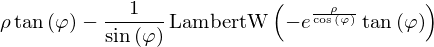

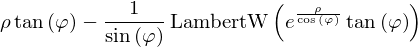

dobijemo vrijednosti


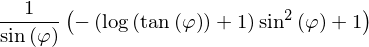

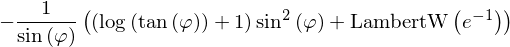

In [12]:
## Trazenje vrijednosti u koja za fiksni phi i za
## rho = - cos(phi) (1 + log(|tan(phi)|)) i za v = 0 zadovoljava jednadzbu
##     (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))

# Parametri phi, rho
phi = sym.Symbol(r"\varphi", reals = True)
rho = sym.Symbol(r"\rho", reals = True)

# Vrijednosti u koje za v = 0 zadovoljavaju jednadzbu
# (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))
nult1 = (-(sym.sin(phi) ** -1) *
         sym.LambertW(-sym.tan(phi) * sym.exp(sym.cos(phi) ** -1 * rho)) +
         sym.tan(phi) * rho)
nult2 = (-(sym.sin(phi) ** -1) *
         sym.LambertW(sym.tan(phi) * sym.exp(sym.cos(phi) ** -1 * rho)) +
         sym.tan(phi) * rho)

# Supstitucija rho = - cos(phi) (1 + log(|tan(phi)|)) u izraze nult1 i nult2
print('Uvrstavanjem')
display(sym.Eq(rho, -sym.cos(phi) * (1 + sym.log(sym.tan(phi))),
               evaluate = False))
print('u izraze')
display(nult1, nult2)
print('dobijemo vrijednosti')
display(sym.simplify(nult1.subs(rho, -sym.cos(phi) * (1 + sym.log(sym.tan(phi))))),
        sym.simplify(nult2.subs(rho, -sym.cos(phi) * (1 + sym.log(sym.tan(phi))))))


Neka su sada ponovo $ \left( \varphi , \rho \right) \in \left[ 0 , \frac{\pi}{2} \right] \times \mathbb{R} $ proizvoljni. Pokušajmo sada pronaći polarnu parametrizaciju varijabli $ u , v $ za jednadžbu
$$ \left( \cos \left( \varphi \right) u - \sin \left( \varphi \right) \rho \right)^{2} + v^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) u + \cos \left( \varphi \right) \rho \right) \right) \text{.} $$
Ako pretpostavimo da postoji neprekidna funkcija $ r \colon \left[ 0 , 2 \pi \right] \to \mathbb{R} $ takva da vrijedi $ r \left( 0 \right) = r \left( 2 \pi \right) $, ali da za svaki $ x_{1} \in \left( 0 , 2 \pi \right) $ i za svaki $ x_{2} \in \left[ 0 , 2 \pi \right] $ vrijedi $ \left( r \left( x_{1} \right) \cos \left( x_{1} \right) , r \left( x_{1} \right) \sin \left( x_{1} \right) \right) \neq \left( r \left( x_{2} \right) \cos \left( x_{2} \right) , r \left( x_{2} \right) \sin \left( x_{2} \right) \right) $ ako vrijedi $ x_{1} \neq x_{2} $, i takva da za svaki $ \vartheta \in \left[ 0 , 2 \pi \right) $ vrijedi $ \left( \cos \left( \varphi \right) \cos \left( \vartheta \right) r \left( \vartheta \right) - \sin \left( \varphi \right) \rho \right)^{2} + \left( \sin \left( \vartheta \right) r \left( \vartheta \right) \right)^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) \cos \left( \vartheta \right) r \left( \vartheta \right) + \cos \left( \varphi \right) \rho \right) \right) $, SymPy ponovo _ne će znati_ izračunati vrijednost $ r \left( \vartheta \right) $ za proizvoljni $ \vartheta \in \left[ 0 , 2 \pi \right) $.

Parametrizacijom


jednadzbu


za fiksne parametre


i za fiksni


zadovoljava r s vrijednosti


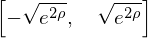

za


odnosno


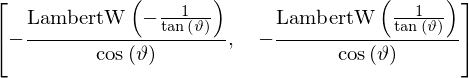

za


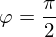

Ako bi nas zanimala vrijednost koja jednadzbu zadovoljava za


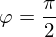

i proizvoljni


i proizvoljni


njeno rjesavanje preko SymPy paketa rezultiralo bi iznimkom
multiple generators [r, exp(r*cos(\vartheta))]
No algorithms are implemented to solve equation \rho**2 + r**2*sin(\vartheta)**2 - exp(2*r*cos(\vartheta))
Za proizvoljne


i proizvoljni


rjesavanje jednadzbe preko SymPy paketa takoder rezultira iznimkom
multiple generators [r, exp(r*sin(\varphi)*cos(\vartheta))]
No algorithms are implemented to solve equation r**2*sin(\vartheta)**2 + (-\rho*sin(\varphi) + r*cos(\varphi)*cos(\vartheta))**2 - exp(2*\rho*cos(\varphi) + 2*r*sin(\varphi)*cos(\vartheta))


In [13]:
## Trazenje vrijednosti r koja za fiksne phi, rho, theta zadovoljava jednadzbu
##     (cos(phi) cos(theta) r - sin(phi) rho)^2 + (sin(theta) r)^2 =
##     = exp(2 (sin(phi) cos(theta) r + cos(phi) rho))

# Parametri phi, rho
phi = sym.Symbol(r"\varphi", reals = True)
rho = sym.Symbol(r"\rho", reals = True)

# Realne varijable u, v
u = sym.Symbol('u', reals = True)
v = sym.Symbol('v', reals = True)

theta = sym.Symbol(r"\vartheta", reals = True)
r = sym.Symbol('r', reals = True)

# Jednadzba
# (cos(phi) u - sin(phi) rho)^2 + v^2 = exp(2 (sin(phi) u + cos(phi) rho))
jedn = sym.Eq((sym.cos(phi) * u - sym.sin(phi) * rho) ** 2 + v ** 2,
              sym.exp(2 * (sym.sin(phi) * u + sym.cos(phi) * rho)),
              evaluate = False)

# Rjesavanje jednadzbe jedn po r nakon supstitucije u = r cos(theta) i
# v = r sin(theta)
print('Parametrizacijom')
display(sym.Eq(u, r * sym.cos(theta)), sym.Eq(v, r * sym.sin(theta)))
print('jednadzbu')
display(jedn)
print('za fiksne parametre')
display(phi, rho)
print('i za fiksni')
display(theta)
print('zadovoljava r s vrijednosti')
display(sym.solve(jedn.subs({phi : 0,
                             u : r * sym.cos(theta),
                             v : r * sym.sin(theta)}), r))
print('za')
display(sym.Eq(phi, 0, evaluate = False))
print('odnosno')
display(sym.solve(jedn.subs({phi : sym.pi / 2,
                             rho : 0,
                             u : r * sym.cos(theta),
                             v : r * sym.sin(theta)}), r))
print('za')
display(sym.Eq(phi, sym.pi / 2, evaluate = False),
        sym.Eq(rho, 0, evaluate = False))

# Demonstracija da se paketom SymPy opci slucaj ne moze rijesiti
print('Ako bi nas zanimala vrijednost koja jednadzbu zadovoljava za')
display(sym.Eq(phi, sym.pi / 2, evaluate = False))
print('i proizvoljni')
display(rho)
print('i proizvoljni')
display(theta)
print('njeno rjesavanje preko SymPy paketa rezultiralo bi iznimkom')
try:
    sym.solve(jedn.subs({phi : sym.pi / 2,
                         u : r * sym.cos(theta),
                         v : r * sym.sin(theta)}), r)
except NotImplementedError as exc:
    print(exc)
print('Za proizvoljne')
display(phi, rho)
print('i proizvoljni')
display(theta)
print('rjesavanje jednadzbe preko SymPy paketa takoder rezultira iznimkom')
try:
    sym.solve(jedn.subs({u : r * sym.cos(theta), v : r * sym.sin(theta)}), r)
except NotImplementedError as exc:
    print(exc)


### Primjeri <a name="primjeri"></a>

Definirat ćemo prvo neke funkcije u Pythonu za simbolički prikaz skupa točaka u ravnini zadanog implicitnom jednadžbom
$$ \left( \cos \left( \varphi \right) x - \sin \left( \varphi \right) \rho \right)^{2} + y^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) x + \cos \left( \varphi \right) \rho \right) \right) \text{,} $$
što ćemo u komentarima i dokumentaciji zvati **presjek**.

In [14]:
import sys # Sistemske informacije

## Funkcije za simbolicki racun skupa tocaka u ravnini dobivenog presjekom s
## eksponencijalnim rogom

## Funkcija za olaksavanje ucitavanja simbolickih matematickih izraza
def sim_unos (query = str(), **kwargs):
    """
Ucitavanje simbolickog izraza na upit query. Rjecnik kwargs sluzi za
supstituciju ucitanih vrijednosti nekim zadanim vrijednostima, na primjer u
pozivima
    x = ucitaj_simbolicki('x = ')
    y = ucitaj_simbolicki('y = ', x = x)
ako se za y upise neki izraz u ovisnosti o x, 'x' ce se u tom izrazu zamijeniti
vrijednoscu ucitanom za x.
    """
    # Ucitavanje s obzirom na verziju Pythona
    if sys.hexversion < 0x03000000:
        SYM = sym.sympify(raw_input(query))
    else:
        SYM = sym.sympify(input(query))

    # Zamjena varijabli
    for KEY in kwargs:
        SYM = SYM.subs(sym.Symbol(KEY), kwargs[KEY])

    # Povrat ucitanog izraza
    return SYM

## Funkcija za konstrukciju implicitne jednadzbe presjeka
def sim_presjek_jedn (phi = sym.Symbol(r"\varphi", reals = True),
                      rho = sym.Symbol(r"\rho", reals = True),
                      x = sym.Symbol('x', reals = True),
                      y = sym.Symbol('y', reals = True),
                      *args, **kwargs):
    """
Simbolicka implicitna jednadzba
    (cos(phi) x - sin(phi) rho)^2 + y^2 = exp(2 (sin(phi) x + cos(phi) rho)).

Ako neki od argumenata od phi, rho sadrzi x i/ili y, dobivena implicitna
jednadzba nije stvarna jednadzba presjeka ravnine i eksponencijalnog roga jer
parametri phi, rho nisu fiksni.

Argumenti *args i **kwargs se, bez prethodne analize, prosljeduju pozivu funkcije
    sym.Eq(...)
pocevsi od 3. argumenta.
    """
    # Povrat implicitne jednadzbe presjeka
    return sym.Eq((sym.cos(phi) * x - sym.sin(phi) * rho) ** 2 + y ** 2,
                  sym.exp(2 * (sym.sin(phi) * x + sym.cos(phi) * rho)),
                  *args, **kwargs)

## Funkcija za prikazivanje grafa presjeka simbolickim izrazom
def sim_presjek_graf (phi, rho, xlim = None, ylim = None, **kwargs):
    """
Prikaz skupa tocaka zadanog implicitnom jednadzbom
impl_presjek_jedn(phi, rho, x, y) pomocu funkcije sympy.plot_implicit(...). Ako
su kljucne rijeci 'x' i/ili 'y' zadane (preko kwargs), interpretiraju se
kao koordinatne varijable x, y; inace se uzimaju redom
sym.Symbol('x', reals = True), sym.Symbol('y', reals = True). Ostatak rjecnika
argumenata zadanih preko kljucne rijeci (kwargs), osim kljucnih rijeci 'x_var' i
'y_var' (ako postoje), prosljeduje se pozivu funkcije sympy.plot_implicit(...)
bez prethodne analize.
    """
    # "Ciscenje" rjecnika kwargs radi izbjegavanja konfliktnih argumenata u
    # pozivu funkcije sympy.plot_implicit(...)
    kwargs.pop('x_var', None)
    kwargs.pop('y_var', None)

    # Koordinatne varijable
    x = kwargs.pop('x', sym.Symbol('x', reals = True))
    y = kwargs.pop('y', sym.Symbol('y', reals = True))

    # Implicitna jednadzba presjeka
    IMPL = sim_presjek_jedn(phi, rho, x, y, evaluate = False)

    # Citanje argumenata xlim i ylim
    if not xlim is None:
        if not isinstance(xlim, tuple):
            try:
                xlim = tuple(xlim)
            except TypeError:
                raise TypeError('Ne-None ergument xlim nije tipa '
                                'konvertabilnog u tuple')
            except ValueError:
                raise ValueError('Ne-None argument xlim nije vrijednosti '
                                 'konvertabilne u tuple')
        if len(xlim) != 2:
            raise TypeError('Ne-None argument xlim mora zadavati tocno dvije '
                            'vrijednosti (x_min, x_max)')
        x = (x, *xlim)
    if not ylim is None:
        if not isinstance(ylim, tuple):
            try:
                ylim = tuple(ylim)
            except TypeError:
                raise TypeError('Ne-None ergument ylim nije tipa '
                                'konvertabilnog u tuple')
            except ValueError:
                raise ValueError('Ne-None argument ylim nije vrijednosti '
                                 'konvertabilne u tuple')
        if len(ylim) != 2:
            raise TypeError('Ne-None argument ylim mora zadavati tocno dvije '
                            'vrijednosti (y_min, y_max)')
        y = (y, *ylim)

    # Prikazivanje grafa
    return sym.plot_implicit(IMPL, x, y, **kwargs)


Osim simboličkog, koristit ćemo i numerički prikaz presjeka, pa definirajmo i neke funkcije u Pythonu korisne za to.

In [15]:
import math                     # jednostavne matematicke funkcije
from scipy import special as sp # znanstveni racun

## Funkcije za numericki racun skupa tocaka u ravnini dobivenog presjekom s
## eksponencijalnim rogom

## Funkcija za simplifikaciju parametara phi, rho u skup [0, 2 pi) x R
def simpl_presjek_param (phi, rho, tol = 1e-8, is_zero = None):
    """
Simplifikacija parametara phi, rho u parametre phi', rho' tako da su skupovi
tocaka zadanih implicitnim jednadzbama
    (cos(phi) x - sin(phi) rho)^2 + y^2 = exp(2 (sin(phi) x + cos(phi) rho))
i
    (cos(phi') x - sin(phi') rho')^2 + y^2 =
    = exp(2 (sin(phi') x + cos(phi') rho'))
jednaki do na ortogonalne transformacije, a da vrijedi 0 <= phi' <= pi / 2.
Izracunati phi', rho' su povratna vrijednost funkcije (kao tuple).

Ako funkcija is_zero nije zadana (ili ako je zadana kao None), a vrijednost
tolerancije tol je zadana i strogo pozitivna je, uzima se
    is_zero = lambda x : abs(x) < tol;
ako je vrijednost tolerancije tol zadana kao None uzima se
    is_zero = lambda x : x == 0;
inace se izbacuje iznimka tipa ValueError.

Za svake r, s jednakost
    r == s
provjerava se pozivom
    is_zero(r - s).
Posebno, za svaki r jednakost
    r == 0
provjerava se pozivom
    is_zero(r).
    """
    # Dedukcija funkcije is_zero
    if is_zero is None:
        if not tol is None:
            if tol <= 0:
                raise ValueError('Ne-none argument tolerancije tol mora biti '
                                 'strogo pozitivni broj')
            is_zero = lambda x_var : abs(x_var) < tol
        else:
            is_zero = lambda x_var : x_var == 0

    # Simplifikacija parametara phi, rho
    if phi < 0 and not is_zero(phi) or phi > np.pi and not is_zero(phi - np.pi):
        N = int(math.floor(phi / np.pi))
        phi -= N * np.pi
        rho = -1 ** N * rho
    if phi > np.pi / 2 and not is_zero(phi - np.pi / 2):
        phi = np.pi - phi
        rho = -rho

    # Povrat simplificiranih parametara
    return phi, rho

## Funkcija za racunanje nultocaka grafa presjeka
def num_presjek_nult (phi, rho, tol = 1e-8, is_zero = None):
    """
Vrijednosti x za koje v = 0 zadovoljava jednadzbu
    (cos(phi') x - sin(phi') rho')^2 + v^2 =
    = exp(2 (sin(phi') x + cos(phi') rho')),
gdje su phi', rho' povratne vrijednosti poziva funkcije
    simpl_presjek_param(phi, rho, tol, is_zero).
Vrijednosti se spremaju uzlazno sortirane u np.array, koji je povratna
vrijednost funkcije.

Ako funkcija is_zero nije zadana (ili ako je zadana kao None), a vrijednost
tolerancije tol je zadana i strogo pozitivna je, uzima se
    is_zero = lambda x : abs(x) < tol;
ako je vrijednost tolerancije tol zadana kao None uzima se
    is_zero = lambda x : x == 0;
inace se izbacuje iznimka tipa ValueError.


Za svake r, s jednakost
    r == s
provjerava se pozivom
    is_zero(r - s).
Posebno, za svaki r jednakost
    r == 0
provjerava se pozivom
    is_zero(r).

Ako je vrijednost tolerancije tol zadana (kao ne-None vrijednost) i ako se
nultocke racunaju preko poziva funkcije scipy.special.lambertw(...), tol se
prosljeduje kao vrijednost tolerancije pozivu funkcije
scipy.special.lambertw(...).
    """
    # Dedukcija tolerancije tol i funkcije is_zero
    if is_zero is None:
        if not tol is None:
            if tol <= 0:
                raise ValueError('Ne-none argument tolerancije tol mora biti '
                                 'strogo pozitivni broj')
            is_zero = lambda x_var : abs(x_var) < tol
        else:
            is_zero = lambda x_var : x_var == 0

    # Simplifikacija parametara phi, rho
    phi, rho = simpl_presjek_param(phi, rho, tol, is_zero)

    # Racunanje i povrat nultocki u ovisnosti o vrijednostima phi, rho
    if is_zero(phi):
        return np.array(sorted([-np.exp(rho), np.exp(rho)]), dtype = float)
    elif is_zero(phi - np.pi / 2):
        if not is_zero(rho):
            return np.array([np.log(abs(rho))], dtype = float)
    else:
        AUX = np.tan(phi) * np.exp(np.cos(phi) ** -1 * rho)
        if (AUX < np.exp(-1) and AUX > -np.exp(-1) or
            is_zero(AUX - np.exp(-1)) or is_zero(AUX + np.exp(-1))):
            if not tol is None:
                return np.array(sorted([-(np.sin(phi) ** -1) *
                                            sp.lambertw(-AUX, tol = tol).real +
                                            np.tan(phi) * rho,
                                        -(np.sin(phi) ** -1) *
                                            sp.lambertw(AUX, tol = tol).real +
                                            np.tan(phi) * rho]),
                                dtype = float)
            else:
                return np.array(sorted([-(np.sin(phi) ** -1) *
                                            sp.lambertw(-AUX).real +
                                            np.tan(phi) * rho,
                                        -(np.sin(phi) ** -1) *
                                            sp.lambertw(AUX).real +
                                            np.tan(phi) * rho]),
                                dtype = float)
        elif AUX < np.exp(-1) or is_zero(AUX - np.exp(-1)):
            if not tol is None:
                return np.array([-(np.sin(phi) ** -1) *
                                 sp.lambertw(-AUX, tol = tol).real +
                                 np.tan(phi) * rho],
                                dtype = float)
            else:
                return np.array([-(np.sin(phi) ** -1) * sp.lambertw(-AUX).real +
                                 np.tan(phi) * rho],
                                dtype = float)
        elif AUX > -np.exp(-1) or is_zero(AUX + np.exp(-1)):
            if not tol is None:
                return np.array([-(np.sin(phi) ** -1) *
                                 sp.lambertw(AUX, tol = tol).real +
                                 np.tan(phi) * rho],
                                dtype = float)
            else:
                return np.array([-(np.sin(phi) ** -1) * sp.lambertw(AUX).real +
                                 np.tan(phi) * rho],
                                dtype = float)

    # Povrat praznog niza nultocki
    return np.array([], dtype = float)

## Funkcija za prikazivanje grafa presjeka numerickim racunom
def num_presjek_graf (phi, rho, *args, **kwargs):
    """
Prikaz skupa tocaka zadanog implicitnom jednadzbom
    (cos(phi') x - sin(phi') rho')^2 + y^2 =
    = exp(2 (sin(phi') x + cos(phi') rho'))
gdje su phi', rho' povratne vrijednosti poziva funkcije
    simpl_presjek_param(phi, rho, tol, is_zero)
pomocu poziva funkcije matplotlib.pyplot.plot(...).

Kompletni *args se, bez prethodne analize, prosljeduje adekvatnom pozivu
funkcije
    plot(...)
pocevsi od 3. argumenta.

Dodatni argumenti koji se mogu zadati kao kljucne rijeci:
    --  ax  --  ako je argument s kljucnom rijeci 'ax' zadan, graf se prikazuje
                pozivom funkcije
                    kwargs['ax'].plot(...),
                inace se prikazuje pozivom funkcije
                    matplotlib.pyplot.plot(...),
    --  x   --  podrucje na osi x nad kojim se graf prikazuje,
            --  zadavanje
                    x = None
                ekvivalentno je nezadavanju podrucja prikaza grafa,
            --  ako nije eksplicitno zadano, podrucje grafa deducira se
                povratnom vrijednosti poziva funkcije
                    num_presjek_nult(phi, rho, ...)
                tako da:
                (1) ako graf ima dvije nultočke x01 i x02 takve da je x01 < x02,
                    uzima se
                        x = numpy.linspace(x01, x02, ...),
                (2) ako grad ima jednu nenul nultočku, x0, uzima se
                        x = numpy.linspace(-|x0|, |x0|, ...),
                (3) inace se uzima
                        x = numpy.linspace(-1, 1, ...),
                pri cemu se, ako je kljucna rijec 'num' zadana, koristi poziv
                        numpy.linspace(..., kwargs['num']),
                a inace
                        numpy.linspace(...),
            --  graf se prikazuje samo nad vrijednostima od x nad kojima je
                definiran, nad svakom samo jednom za y >= 0 i y <= 0, i to
                redom:
                (1) od max(x) do min(x) za y >= 0,
                (2) od min(x) do max(x) za y <= 0,
                (3) ako je kljucna rijec 'close' zadana s eksplicitnom
                    vrijednosti True, max(x) s odgovarajucim y >= 0 se na kraju
                    jos jednom prikazuje na kraju,
    --  num --  ako se podrucje x mora deducirati (ako nije eksplicitno zadano
                kao ne-None), prosljeduje se u pozivu funkcije
                    numpy.linspace(..., kwargs['num']),
    --  close   --  ako je zadano
                        close = True,
                    graf se "zatvara" prikazivanjem prve tocke dvaput, na
                    pocetku i na kraju (vidi kljucnu rijec 'x'),
    --  tol, is_zero    --  prosljeduju se pozivu funkcije
                                simpl_presjek_param(phi,
                                                    rho,
                                                    kwargs['tol'],
                                                    kwargs['is_zero'])
                            i, ako je potrebno, pozivu funkcije
                                num_presjek_nult(phi,
                                                 rho,
                                                 kwargs['tol'],
                                                 kwargs['is_zero']),
    --  ostali se prosljeduju se adekvatnom pozivu funkcije
            plot(...).
    """
    # "Ciscenje" rjecnika kwargs radi izbjegavanja konfliktnih argumenata u
    # pozivu funkcije matplotlib.pyplot.plot(...)
    kwargs.pop('xdata', None)
    kwargs.pop('ydata', None)

    # Dedukcija parametra ax
    ax = kwargs.pop('ax', None)

    # Dedukcija tolerancije tol i funkcije is_zero
    tol = kwargs.pop('tol', 1e-8)
    if 'is_zero' in kwargs:
        is_zero = kwargs.pop('is_zero')
    else:
        if not tol is None:
            if tol <= 0:
                raise ValueError('Ne-none argument tolerancije tol mora biti '
                                 'strogo pozitivni broj')
            is_zero = lambda x_var : abs(x_var) < tol
        else:
            is_zero = lambda x_var : x_var == 0

    # Simplifikacija parametara phi, rho
    phi, rho = simpl_presjek_param(phi, rho, tol, is_zero)

    # Dedukcija podrucja x
    if 'x' in kwargs:
        x = kwargs.pop('x')
        kwargs.pop('num', None)
    else:
        x = num_presjek_nult(phi, rho, tol, is_zero)
        if len(x) == 0:
            x = np.array([-1, 1], dtype = float)
        elif len(x) == 1:
            if x[0] == 0:
                x = np.array([-1, 1], dtype = float)
            else:
                x = np.sort(np.array([-x[0], x[0]], dtype = float))
        if 'num' in kwargs:
            x = np.linspace(x.min(), x.max(), kwargs.pop('num'))
        else:
            x = np.linspace(x.min(), x.max())
    close = kwargs.pop('close', False)
    x = np.unique(x)
    x = np.array([x0 for x0 in x
                      if np.exp(2 * (np.sin(phi) * x0 + np.cos(phi) * rho)) -
                         (np.cos(phi) * x0 - np.sin(phi) * rho) ** 2 >= 0],
                 dtype = float)
    x = np.array(list(np.flipud(x)) + list(x), dtype = float)
    if len(x) != 0 and close:
        x = np.array(list(x) + [x[0]], dtype = float)

    # Racunanje vrijednosti y
    y = np.array([(-1) ** (IT // (len(x) // 2)) *
                  np.sqrt(np.exp(2 * (np.sin(phi) * x[IT] +
                                      np.cos(phi) * rho)) -
                          (np.cos(phi) * x[IT] - np.sin(phi) * rho) ** 2)
                      for IT in range(len(x))],
                 dtype = float)

    # Povrat grafa na zadanim osima
    if ax != None:
        return ax.plot(x, y, *args, **kwargs)

    # Povrat grafa
    return plt.plot(x, y, *args, **kwargs)


U idućim primjerima pomoću funkcije `num_presjek_graf` prikazat ćemo neke grafove presjeka.

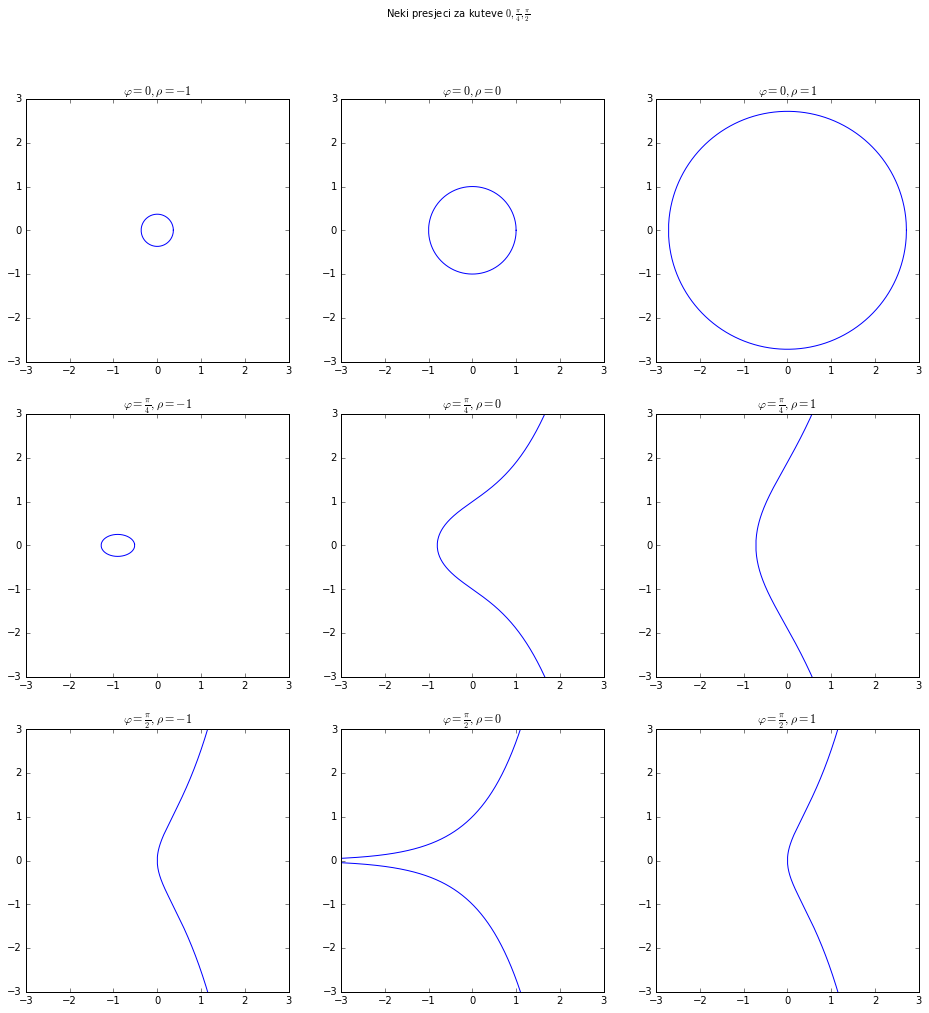

In [16]:
## Presjeci za (phi, rho) iz {0, pi / 4, pi / 2} x {-1, 0, 1}

# Parametri phi, rho
phi = np.array([0, np.pi / 4, np.pi / 2], dtype = float)
rho = np.array([-1, 0, 1], dtype = int)

# LaTeX tekstualne reprezentacije vrijednosti polja phi, rho
phi_txt = ['0', r"\frac{\pi}{4}", r"\frac{\pi}{2}"]
rho_txt = ['{- 1}', '0', '1']

# Slika grafova
fig, axes = plt.subplots(3, 3, figsize = (16, 16))

# Naslov slike
fig.suptitle('Neki presjeci za kuteve $ {0:s} , {1:s} , {2:s} $'.
                 format(*tuple(phi_txt)))

# Crtanje grafova
for i in range(9):
    # Deduciranje podrucja crtanja grafa
    n = num_presjek_nult(phi[i // 3], rho[i % 3])
    if len(n) < 2:
        xmax = 3
    else:
        xmax = abs(max(n.min(), n.max(), key = abs))

    # Konstruiranje grafa
    axes[i // 3, i % 3].set_xlim(-3, 3)
    axes[i // 3, i % 3].set_ylim(-3, 3)
    axes[i // 3, i % 3].set_aspect('equal')
    axes[i // 3, i % 3].set_title(r"$ \varphi = {0:s}, \rho = {1:s} $".
                                      format(phi_txt[i // 3], rho_txt[i % 3]))

    # Crtanje grafa
    num_presjek_graf(phi[i // 3], rho[i % 3],
                     ax = axes[i // 3, i % 3],
                     x = np.linspace(-3, xmax, 1024),
                     close = (len(n) == 2))

# Prikaz grafova
plt.show()

Prethodna slika nije potpuno točna. Naime, za $ \varphi = \frac{\pi}{4} $ i $ \rho = {- 1} $ graf presjeka na $ \left[ {- 3} , 3 \right] \times \left[ {- 3} , 3 \right] $ zapravo izgleda drugačije, a da bi se točno iscrtao sa spajanjem točaka mora se crtati kao dva grafa, jer taj presjek nije povezani skup.

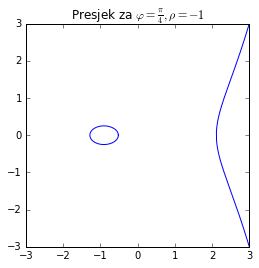

In [17]:
# Parametri phi, rho
phi = np.pi / 4
rho = -1

# Dva podrucja crtanja grafa, do 0 i od 0
x1 = np.linspace(-3, 0, 1024)
x2 = np.linspace(0, 3, 1024)

# Konstruiranje grafa
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.set_title(r"Presjek za $ \varphi = \frac{\pi}{4} , \rho = {- 1} $")

# Crtanje grafa
num_presjek_graf(phi, rho, 'b-', ax = ax, x = x1, close = True)
num_presjek_graf(phi, rho, 'b-', ax = ax, x = x2, close = False)

# Prikaz grafa
plt.show()


Sada kada znamo kako grafovi otprilike izgledaju, promotrimo kako parametri $ \varphi , \rho $ utječu na izgled grafa.

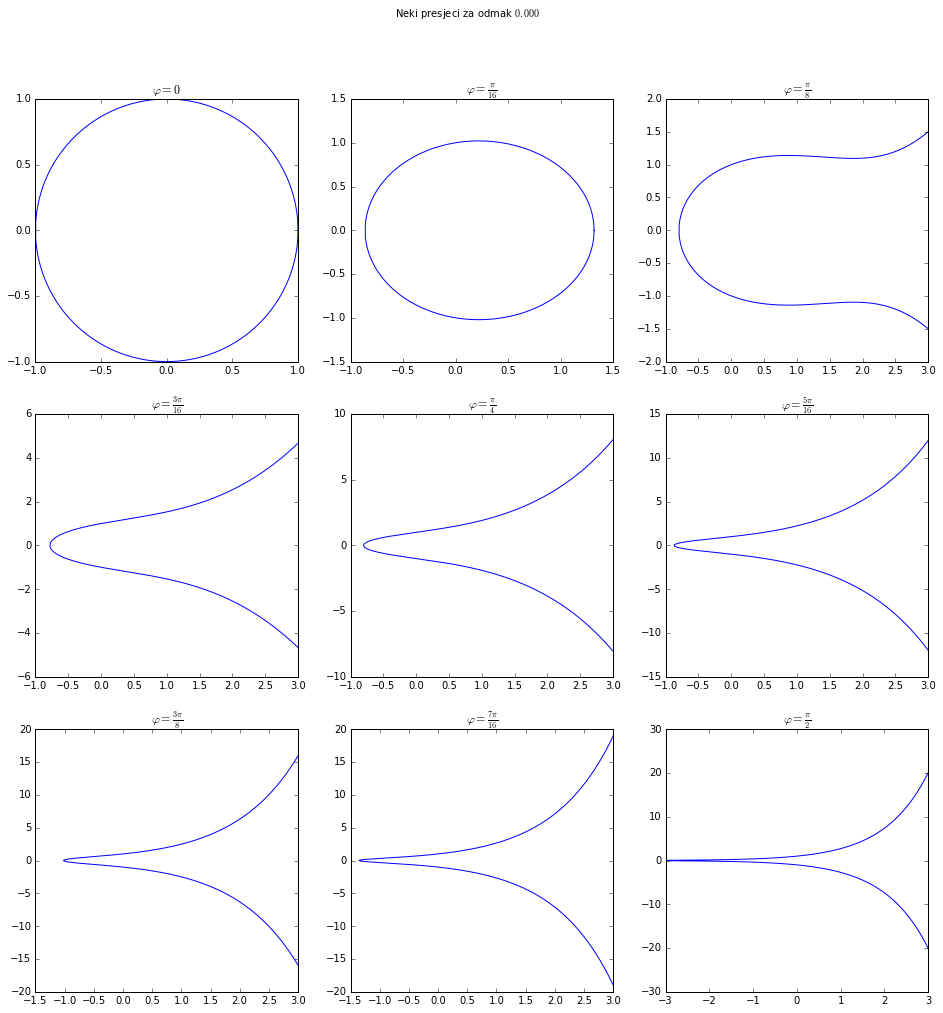

In [18]:
## Progresija grafa presjeka s obzirom na parametar phi

# Ako citatelj zeli zadati parametar rho, valja zamijeniti komentiranost iduce
# dvije linije
#UNOS = True
UNOS = False

# Dimenzije slike (r x c grafova)
r = 3
c = 3

# Parametri phi, rho
phi = np.linspace(0, np.pi / 2, r * c)
if UNOS:
    if sys.hexversion < 0x03000000:
        rho = float(raw_input('rho = '))
    else:
        rho = float(input('rho = '))
else:
    rho = 0.0

# Slika grafova
fig, axes = plt.subplots(r, c, figsize = (16, 16))

# Naslov slike
fig.suptitle('Neki presjeci za odmak $ {0:.3f} $'.format(rho))

# Crtanje grafova
for i in range(r * c):
    # Dedukcija grafa
    if r == 1 and c == 1:
        ax = axes
    else:
        if r == 1 or c == 1:
            ax = axes[i]
        else:
            ax = axes[i // c, i % c]

    # LaTeX tekstualna reprezentacija vrijednosti parametra phi
    if i == 0:
        phi_txt = '0'
    else:
        if i // math.gcd(i, 16) == 1:
            if math.gcd(i, 16) == 16:
                phi_txt = r"\pi"
            else:
                phi_txt = (r"\frac{\pi}{" +
                           "{0:d}".format(16 // math.gcd(i, 16)) +
                           r"}")
        else:
            phi_txt = (r"\frac{" +
                       "{0:d}".format(i // math.gcd(i, 16)) +
                       " \pi}{" +
                       "{0:d}".format(16 // math.gcd(i, 16)) +
                       r"}")

    # Deduciranje podrucja crtanja grafa
    n = num_presjek_nult(phi[i], rho)
    if len(n) < 2:
        xmax = 3
    else:
        xmax = abs(max(n.min(), n.max(), key = abs))

    # Konstruiranje grafa
    ax.set_title(r"$ \varphi = {0:s} $".format(phi_txt))

    # Crtanje grafa
    num_presjek_graf(phi[i], rho,
                     ax = ax,
                     x = np.linspace(-3, xmax, 1024),
                     close = (len(n) == 2))

# Prikaz grafova
plt.show()


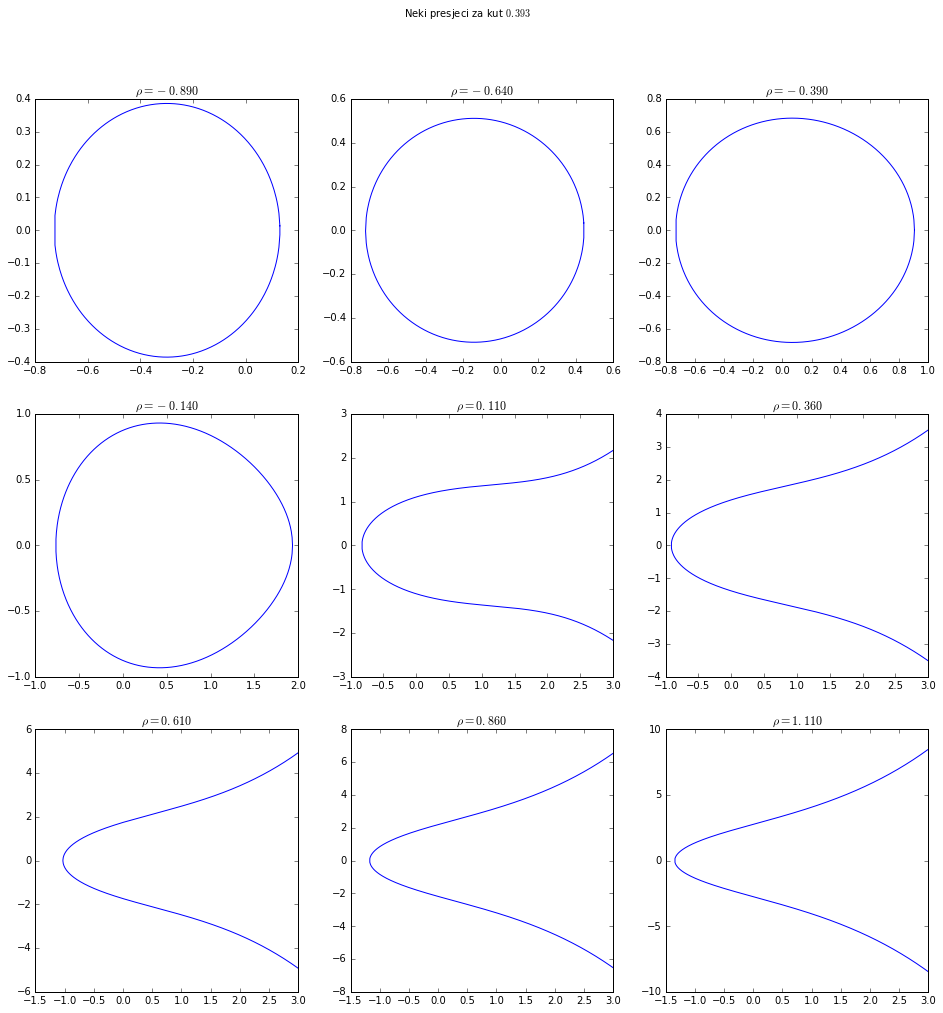

In [19]:
## Progresija grafa presjeka s obzirom na parametar phi

# Ako citatelj zeli zadati parametar rho, valja zamijeniti komentiranost iduce
# dvije linije
#UNOS = True
UNOS = False

# Dimenzije slike (r x c grafova)
r = 3
c = 3

# Parametri phi, rho
if UNOS:
    if sys.hexversion < 0x03000000:
        phi = float(raw_input('phi = '))
    else:
        phi = float(input('phi = '))
else:
    phi = np.pi / 8
phi, rho = simpl_presjek_param(phi, 0)
if abs(phi) >= 1e-4 and abs(phi - np.pi / 2) >= 1e-4:
    rho = np.linspace(np.cos(phi) * (1 + np.log(abs(np.tan(phi)))) - 1,
                      np.cos(phi) * (1 + np.log(abs(np.tan(phi)))) + 1,
                      r * c)
else:
    rho = np.linspace(-1, 1, r * c)

# Slika grafova
fig, axes = plt.subplots(r, c, figsize = (16, 16))

# Naslov slike
fig.suptitle('Neki presjeci za kut $ {0:.3f} $'.format(phi))

# Crtanje grafova
for i in range(r * c):
    # Dedukcija grafa
    if r == 1 and c == 1:
        ax = axes
    else:
        if r == 1 or c == 1:
            ax = axes[i]
        else:
            ax = axes[i // c, i % c]

    # Deduciranje podrucja crtanja grafa
    n = num_presjek_nult(phi, rho[i])
    if len(n) < 2:
        xmax = 3
    else:
        xmax = abs(max(n.min(), n.max(), key = abs))

    # Konstruiranje grafa
    ax.set_title(r"$ \rho = {0:.3f} $".format(rho[i]))

    # Crtanje grafa
    num_presjek_graf(phi, rho[i],
                     ax = ax,
                     x = np.linspace(-3, xmax, 1024), 
                     close = (len(n) == 2))

# Prikaz grafova
plt.show()


Meni je, kao autoru ove zadaće (Davor Penzar), osobno najljepše _jaje_ koje se dobije odabirom $ \varphi \in \left( \frac{\pi}{10} , \frac{\pi}{9} \right) $ i $ \rho = 0 $.

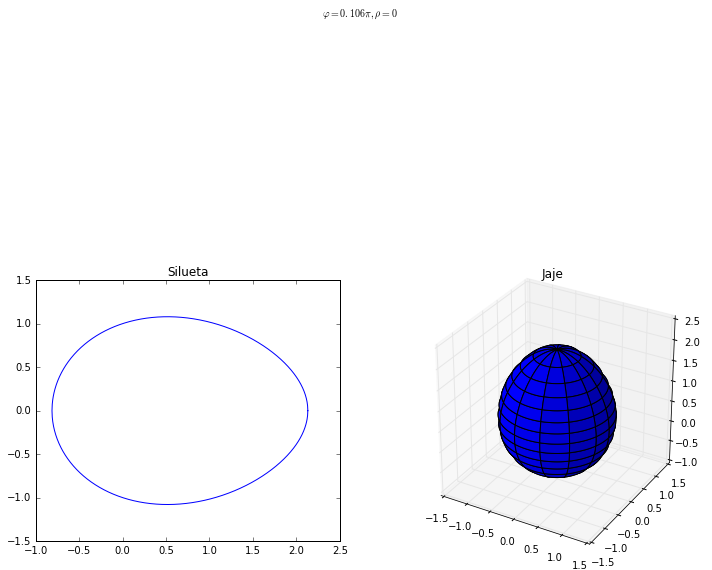

In [20]:
## Prikaz autoru najljepseg jajolikog oblika

# Parametri phi, rho
phi = 0
while phi <= np.pi / 10 or phi >= np.pi / 9:
    phi = np.pi / 10 + np.random.random() * np.pi / 90
rho = 0

# Trazenje vrhova rotacionog tijela
n = num_presjek_nult(phi, rho)
if len(n) == 0:
    n = np.array([-1, 1], dtype = float)
elif len(n) == 1:
    if n[0] == 0:
        n = np.array([-1, 1], dtype = float)
    else:
        n = np.sort(np.array([-x[0], x[0]], dtype = float))

# Parametri za diskretizaciju tocaka rotacionog tijela
theta = np.linspace(0, 2 * np.pi, 128)
u = np.linspace(n.min(), n.max(), 128)
u = np.array([u0 for u0 in u
                  if np.exp(2 * (np.sin(phi) * u0 + np.cos(phi) * rho)) -
                     (np.cos(phi) * u0 - np.sin(phi) * rho) ** 2 >= 0])

# Diskretizacija rotacije siluete
x = np.array([[np.sqrt(np.exp(2 * (np.sin(phi) * u[i] + np.cos(phi) * rho)) -
                       (np.cos(phi) * u[i] - np.sin(phi) * rho) ** 2) *
               np.cos(theta[j])
                   for j in range(len(theta))]
                  for i in range(len(u))])
y = np.array([[np.sqrt(np.exp(2 * (np.sin(phi) * u[i] + np.cos(phi) * rho)) -
                       (np.cos(phi) * u[i] - np.sin(phi) * rho) ** 2) *
               np.sin(theta[j])
                   for j in range(len(theta))]
                  for i in range(len(u))])
z = np.array([[u[i] for j in range(len(theta))] for i in range(len(u))])

# Slika s grafom siluete i njene rotacije
fig = plt.figure(figsize = (12, 12))

# Naslov slike
fig.suptitle(r"$ \varphi = {0:.3f} \pi , \rho = 0 $".format(phi / np.pi))

# Slika siluete
ax = fig.add_subplot(1, 2, 1)

# Konstrukcija grafa
ax.set_aspect('equal')
ax.set_title('Silueta')

# Crtanje grafa
num_presjek_graf(phi, rho, ax = ax, num = 1024, close = True)

# Slika rotacije siluete
ax = fig.add_subplot(1, 2, 2, projection = '3d')

# Konstrukcija grafa
ax.set_aspect('equal')
ax.set_title('Jaje')

# Crtanje grafa
ax.plot_surface(x, y, z)

# Prikaz grafova
plt.show()


Za kraj ovih primjera ostavljam korisniku da se sam zabavlja s parametrima $ \varphi , \rho $ i crtanjem grafa pomocu funkcije `sim_presjek_graf`.

phi = 0
rho = 0
Prikaz skupa tocaka zadanog implicitnom jednadzbom


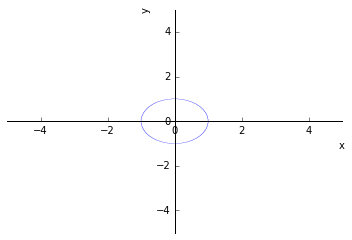

In [21]:
## Graf presjeka s parametrima zadanim od citatelja

# Parametri phi, rho
phi = sim_unos('phi = ', e = sym.E, pi = sym.pi)
rho = sim_unos('rho = ', e = sym.E, pi = sym.pi, phi = phi)

# Prikaz implicitne jednadzbe
print('Prikaz skupa tocaka zadanog implicitnom jednadzbom')
display(sim_presjek_jedn(phi, rho, evaluate = False))

# Crtanje grafa
sim_presjek_graf(phi, rho)

# Prikaz grafa
plt.show()


# Zaključak <a name="zakljucak"></a>

Dokazali smo da za svaku ravninu u $ \mathbb{R}^{3} $ paralelnu s $ y $-osi postoje $ \left( \varphi , \rho \right) \in \left[ 0 , \frac{\pi}{2} \right] \times \mathbb{R} $ takvi da implicitna jednadžba
$$ \left( \cos \left( \varphi \right) x - \sin \left( \varphi \right) \rho \right)^{2} + y^{2} = \exp \left( 2 \left( \sin \left( \varphi \right) x + \cos \left( \varphi \right) \rho \right) \right) $$
zadaje skup točaka dobiven presjekom te ravnine i eksponencijalnog roga; to jest iz proizvoljnih smo parametara izveli jednadžbu koja se može ovako prikazati do na ortogonalne transformacije. Parametar $ \varphi $ može se odrediti iz kuta koji ravnina zadaje s $ x y $-ravninom (odnosno uzima se $ \varphi = 0 $ ako su ravnine paralelne), a parametar $ \rho $ određuje se preko udaljenosti ravnine od ishodišta. Neki zaključci koje smo eksplicitno donijeli ili koji su implicitno proizašli iz gornjih računa:
1. Skup je simetričan s obzirom na $ x $-os.
2. Ako vrijedi $ \varphi = 0 $, implicitna jednadžba zadaje kružnicu.
3. Skup zadan implicitnom jednadžbom predstavlja presjek eksponencijalnog roga s njemu tangencijalnom ravninom ako i samo ako je $ \varphi \in \left( 0 , \frac{\pi}{2} \right) $ i $ \rho = {- \cos \left( \varphi \right)} \left( 1 + \log \left( \tan \left( \varphi \right) \right) \right) $.

Osim izvođenja jednadžbe i neke njene matematičke analize (traženje sjecišta skupa s $ x y $-osi, traženje eventualne polarne parametrizacije...), u [primjerima](#primjeri) opsežan je kod u Pythonu pomoću kojeg si čitatelj može vizualzirati skup zadan spomenutom jednadžbom.